Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input text), star
ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.
Perform following operations on this dataset. 
(i) Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)
(ii) Plot the graph of Ratings distribution.
(iii) Convert the review text into lowercase.
(iv) Remove all punctuations from review text.
(v) Remove emoticons and emojis from the text.
(vi) Tokenize the review text into words.
(vii) Remove the Stopwords from the tokenized text.
(viii) Perform stemming & lemmatization on the review text.
(ix) Perform the word vectorization on review text using Bag of Words technique.
(x) Create representation of Review Text by calculating Term Frequency and Inverse Document Frequency (TF-IDF)

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
#import spacy
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv("AmazonAlexa_Reviews.csv")

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.shape

(3150, 5)

### Plot a graph of Positive and Negative Feedback (1 = Positive Feedback, 0 = Negative Feedback)

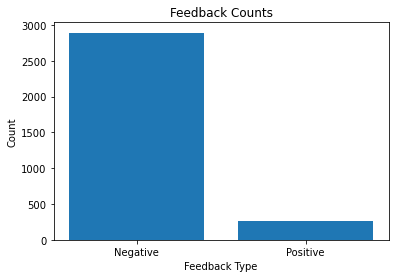

In [5]:
# Compute the count of positive and negative feedback
feedback_counts = df['feedback'].value_counts()

# Plot a bar chart of feedback counts
plt.bar(x=['Negative', 'Positive'], height=feedback_counts.values)
plt.title('Feedback Counts')
plt.xlabel('Feedback Type')
plt.ylabel('Count')
plt.show()

### Plot the graph of Ratings distribution.

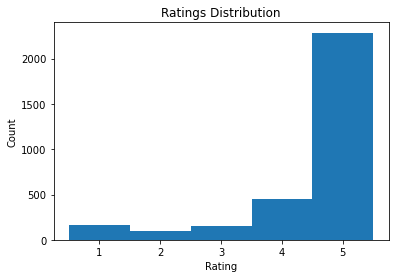

In [6]:
# Plot a histogram of ratings
plt.hist(df['rating'], bins=5, range=(0.5, 5.5), align='mid')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(range(1, 6))
plt.show()

In [7]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [8]:
df_text=df.drop(['rating', 'date', 'variation', 'feedback'],axis=1)

In [9]:
pd.set_option('display.max_colwidth', None)

In [10]:
df_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
...,...
3145,"Perfect for kids, adults and everyone in between!!"
3146,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up."
3147,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."
3148,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers."


### Convert the review text into lowercase

In [11]:
df_text_lower = df_text.apply(lambda x: x.astype(str).str.lower())
df_text_lower

,verified_reviews
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you. i like being able to turn lights on and off while away from home."
3,"i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well."
4,music
...,...
3145,"perfect for kids, adults and everyone in between!!"
3146,"listening to music, searching locations, checking time, looking up weather. there are many more task to learn. it was simple to set up."
3147,"i do love these things, i have them running my entire home, tv, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... i named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."
3148,"only complaint i have is that the sound quality isn't great. i mostly use it for commands though, and i have another dot hooked up to my stereo system to play music through. i have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing i'd go with the full size echo or make sure you hook the do up to some larger speakers."


In [12]:
df['new_text']=df_text_lower

### Remove all punctuations from review text.

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['new_text'].apply(lambda text: remove_punctuation(text))

In [15]:
df['clean_msg']

0                                                                                                                                                                                                                                                                                                                                                                                                                                  love my echo
1                                                                                                                                                                                                                                                                                                                                                                                                                                      loved it
2                                                                                                                                       

### Tokenize the review text into words.

In [16]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['msg_tokenied']= df['clean_msg'].apply(lambda x: tokenization(x))

In [17]:
df['msg_tokenied'].head()

0                                                                                                                                                                                        [love my echo]
1                                                                                                                                                                                            [loved it]
2    [sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home]
3                            [i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well]
4                                                                                                                                                                                               [music]


### Remove the Stopwords from the tokenized text.

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meenu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
ps = PorterStemmer()

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]', ' ', df['verified_reviews'][i]) 
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

for i in range(0, 5):
    print("Sentence {}: {}".format(i+1,corpus[i]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meenu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sentence 1: love echo
Sentence 2: love
Sentence 3: sometim play game answer question correctli alexa say got wrong answer like abl turn light away home
Sentence 4: lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well
Sentence 5: music


In [20]:
df['corpus'] = corpus
df.head()

,rating,date,variation,verified_reviews,feedback,new_text,clean_msg,msg_tokenied,corpus
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,[love my echo],love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,[loved it],love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,"sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you. i like being able to turn lights on and off while away from home.",sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,[sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home],sometim play game answer question correctli alexa say got wrong answer like abl turn light away home
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,"i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.",i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,[i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well],lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,[music],music


In [21]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["msg_tokenied"].apply(lambda text: remove_stopwords(text))
df.head()

,rating,date,variation,verified_reviews,feedback,new_text,clean_msg,msg_tokenied,corpus,text_wo_stop
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,[love my echo],love echo,['love echo']
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,[loved it],love,['loved it']
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,"sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you. i like being able to turn lights on and off while away from home.",sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,[sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home],sometim play game answer question correctli alexa say got wrong answer like abl turn light away home,['sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home']
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,"i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.",i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,[i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well],lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well,['i lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well']
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,[music],music,['music']


### Perform stemming & lemmatization on the review text.

In [22]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["verified_reviews"].apply(lambda text: stem_words(text))
df["text_stemmed"]

0                                                                                                                                                                                                                                                                                                                                                                                                                       love my echo!
1                                                                                                                                                                                                                                                                                                                                                                                                                            love it!
2                                                                                                                                                           

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download()
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()
     

In [23]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# input text
sentence = "This is an example of part of speech tagging."

# tokene into words
tokens = nltk.word_tokenize(sentence)

# parts of speech tagging
tagged = nltk.pos_tag(tokens)

# print tagged tokens
print(tagged)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meenu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\meenu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'), ('is', 'VBZ'), ('an', 'DT'), ('example', 'NN'), ('of', 'IN'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('tagging', 'NN'), ('.', '.')]


In [24]:
def process_content():
    try:
        for i in df['text_wo_stop']:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))

process_content()
     

[('[', 'JJ'), ("'love", "''"), ('echo', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'loved", 'VBD'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'sometimes", 'NNS'), ('playing', 'VBG'), ('game', 'NN'), ('answer', 'JJR'), ('question', 'NN'), ('correctly', 'RB'), ('alexa', 'VBZ'), ('says', 'VBZ'), ('got', 'VBD'), ('wrong', 'JJ'), ('answers', 'NNS'), ('like', 'IN'), ('able', 'JJ'), ('turn', 'NN'), ('lights', 'NNS'), ('away', 'RB'), ('home', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('lot', 'NN'), ('fun', 'JJ'), ('thing', 'NN'), ('4', 'CD'), ('yr', 'NN'), ('old', 'JJ'), ('learns', 'VBZ'), ('dinosaurs', 'NNS'), ('control', 'NN'), ('lights', 'NNS'), ('play', 'VBP'), ('games', 'NNS'), ('like', 'IN'), ('categories', 'NNS'), ('nice', 'JJ'), ('sound', 'JJ'), ('playing', 'NN'), ('music', 'NN'), ('well', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'music", 'POS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('received',

[('[', 'JJ'), ("'sounds", 'VBZ'), ('great', 'JJ'), ('love', 'VB'), ('them', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'fun", 'POS'), ('item', 'NN'), ('play', 'NN'), ('get', 'VBP'), ('used', 'VBN'), ('using', 'VBG'), ('sometimes', 'RB'), ('hard', 'JJ'), ('time', 'NN'), ('answering', 'VBG'), ('questions', 'NNS'), ('ask', 'VBP'), ('think', 'VBP'), ('better', 'JJR'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'just", 'MD'), ('like', 'VB'), ('one', 'CD'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'still", 'MD'), ('learning', 'VB'), ('capabilitiesbut', 'NN'), ('far', 'RB'), ('pretty', 'RB'), ('pretty', 'JJ'), ('pretty', 'RB'), ('good', 'JJ'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'she", 'POS'), ('works', 'NNS'), ('well', 'RB'), ('needs', 'VBZ'), ('learning', 'VBG'), ('command', 'NN'), ('unique', 'NN'), ('owners', 'NNS'), ('users', 'NNS'), ('like', 'IN'), ('alexa', 'JJ'), ('“', 'NNP'

[('[', 'NN'), ("'you", 'POS'), ('’', 'NNP'), ('re', 'NN'), ('needna', 'NN'), ('na', 'TO'), ('nana', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'does", 'NNS'), ('everything', 'NN'), ('expected', 'VBD'), ('more', 'RBR'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('echo', 'VBP'), ('works', 'NNS'), ('like', 'IN'), ('said', 'VBD'), ('would', 'MD'), ('dont', 'VB'), ('34smart34', 'CD'), ('home', 'NN'), ('can', 'MD'), ('not', 'RB'), ('speak', 'VB'), ('function', 'NN'), ('everything', 'NN'), ('else', 'RB'), ('good', 'JJ'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'great", 'POS'), ('sound', 'NN'), ('small', 'JJ'), ('package—easy', 'NN'), ('set', 'VBN'), ('use', 'NN'), ('fun', 'NN'), ('own', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'POS'), ('sounds', 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'VB'), ("'the", 'POS'), ('sound', 'JJ'), ('amazing', 'VBG'), ('many', 'JJ'), ('collections', 'NNS'), ('music', 'NN'), ("'", 

[('[', 'JJ'), ("'very", 'POS'), ('easy', 'JJ'), ('set', 'NN'), ('works', 'VBZ'), ('wonderful', 'JJ'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'im", 'POS'), ('really', 'RB'), ('impressed', 'JJ'), ('sound', 'NN'), ('quality', 'NN'), ('playing', 'VBG'), ('music', 'NN'), ('device', 'NN'), ('bass', 'NN'), ('sounds', 'VBZ'), ('almost', 'RB'), ('like', 'IN'), ('coming', 'VBG'), ('bigger', 'JJR'), ('speaker', 'NN'), ('props', 'VBZ'), ('amazon', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('’', 'NN'), ('s', 'NN'), ('still', 'RB'), ('great', 'JJ'), ('productbut', 'NN'), ('sound', 'JJ'), ('quality', 'NN'), ('seem', 'VBP'), ('worsedon', 'WRB'), ('’', 'NN'), ('t', 'NN'), ('get', 'VBP'), ('wrong', 'JJ'), ('definitely', 'RB'), ('get', 'VBP'), ('used', 'VBN'), ('within', 'IN'), ('hour', 'NN'), ('definitely', 'RB'), ('feels', 'VBZ'), ('like', 'IN'), ('echo', 'NN'), ('gen', 'NN'), ('1', 'CD'), ('sound', 'NN'), ('quality', 'NN'), ('betterbesides', 'IN')

[('[', 'RB'), ("'love", 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('sound', 'JJ'), ('quality', 'NN'), ('unit', 'NN'), ('clear', 'JJ'), ('sound', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('listening', 'VBG'), ('talk', 'NN'), ('radio', 'NN'), ('morning', 'NN'), ('turning', 'VBG'), ('lights', 'NNS'), ('etc', 'NN'), ('system', 'NN'), ('excellent', 'JJ'), ('job', 'NN'), ('full', 'JJ'), ('house', 'NN'), ('sound', 'NN'), ('system', 'NN'), ('streaming', 'VBG'), ('sirius', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('week', 'NN'), ('still', 'RB'), ('learning', 'VBG'), ('alexa', 'RP'), ('learning', 'VBG'), ('process', 'NN'), ('love', 'NN'), ('music', 'NN'), ('call', 'NN'), ('time', 'NN'), ('listen', 'JJ'), ('podcasts', 'VBZ'), ('radio', 'NN'), ('stations', 'NNS'), ('started', 'VBD'), ('keeping', 'VBG'), ('shopping', 'NN'), ('lists', 'NNS'), ('grocery', 'VBP'), ('lists', '

[('[', 'JJ'), ("'very", 'POS'), ('good', 'JJ'), ('quality', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ('sounds', 'VBZ'), ('great', 'JJ'), ('miss', 'JJ'), ('beat', 'NN'), ('wish', 'JJ'), ('battery', 'NN'), ('better', 'RBR'), ('portability', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'loved", 'VBD'), ('till', 'RB'), ('someone', 'NN'), ('stoled', 'VBD'), ('cant', 'JJ'), ('afford', 'NN'), ('replace', 'VB'), ('yet', 'RB'), ('going', 'VBG'), ('too', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'alexa", "''"), ('rocks', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'got", 'VBD'), ('gift', 'NN'), ('love', 'NN'), ('never', 'RB'), ('would', 'MD'), ('bought', 'VB'), ('one', 'CD'), ('allows', 'VBZ'), ('play', 'NN'), ('music', 'NN'), ('amozon', 'NN'), ('prime', 'JJ'), ('music', 'NN'), ('thats', 'NNS'), ('worth', 'VBP'), ('also', 'RB'), ('gives', 'VBZ'), ('news', 'NN'), ('briefs', 'NNS'), ('tells', 'VBZ'), ('jokes', 'NNS'), ("'", 'POS'), (']'

[('[', 'RB'), ("'our", 'CD'), ('family', 'NN'), ('really', 'RB'), ('loves', 'VBZ'), ('new', 'JJ'), ('echo', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'bought", 'MD'), ('wife', 'NN'), ('loves', 'VBZ'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'fun", 'NNP'), ('got', 'VBD'), ('today', 'NN'), ('pod', 'NN'), ('go', 'VBP'), ('car', 'NN'), ('use', 'NN'), ('house', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'like", 'POS'), ('more', 'RBR'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'JJ'), ('third', 'JJ'), ('echo', 'JJ'), ('worth', 'NN'), ('every', 'DT'), ('penny', 'NN'), ('like', 'IN'), ('3', 'CD'), ('household', 'NN'), ('employees', 'NNS'), ('small', 'JJ'), ('flat', 'JJ'), ('rate', 'NN'), ('keep', 'VB'), ('bedrooms', 'IN'), ('living', 'NN'), ('room', 'NN'), ('dropin', 'NN'), ('use', 'NN'), ('intercom', 'NN'), ('listen', 'JJ'), ('music', 'NN'), ('answer', 'NN'), ('quick', 'JJ'), ('questions', 'NNS'), ('alarms', 'NNS'), ('wake', 'VBP'), ('school', 'NN'), 

[('[', 'JJ'), ("'we", 'POS'), ('glad', 'NN'), ('got', 'VBD'), ('echo', 'JJ'), ('bluetooth', 'DT'), ('speaker', 'NN'), ('alexa', 'RB'), ('much', 'JJ'), ('stuff', 'NN'), ('non', 'IN'), ('smart', 'JJ'), ('speakers', 'NNS'), ('personally', 'RB'), ('love', 'VBP'), ('timer', 'NN'), ('feature', 'NN'), ('helped', 'VBD'), ('cooking', 'VBG'), ('multiple', 'JJ'), ('things', 'NNS'), ('simultaneously', 'RB'), ('pandora', 'JJ'), ('integration', 'NN'), ('another', 'DT'), ('feature', 'NN'), ('use', 'VBP'), ('daily', 'JJ'), ('happy', 'JJ'), ('prime', 'JJ'), ('day', 'NN'), ('purchase', 'NN'), ('get', 'VB'), ('echo', 'JJ'), ('hub', 'NN'), ('echo', 'JJ'), ('dots', 'JJ'), ('future', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'see", 'POS'), ('subject', 'JJ'), ('line', 'NN'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'love", 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'very", 'POS'), ('easy', 'JJ'), ('setup', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', '

[('[', 'NN'), ("'use", 'POS'), ('time', 'NN'), ('especially', 'RB'), ('communicate', 'JJ'), ('kids', 'NNS'), ('throughout', 'IN'), ('home', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'love", 'CD'), ('still', 'RB'), ('learning', 'VBG'), ('makes', 'VBZ'), ('lot', 'NN'), ('things', 'NNS'), ('easier', 'RBR'), ('like', 'IN'), ('forget', 'VB'), ('turn', 'NN'), ('light', 'JJ'), ('another', 'DT'), ('room', 'NN'), ('ask', 'NN'), ('alexa', 'JJ'), ('turn', 'NN'), ('light', 'VBD'), ('off', 'RP'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'bought", 'MD'), ('daughter', 'VB'), ('turned', 'VBD'), ('9', 'CD'), ('loves', 'NNS'), ('especially', 'RB'), ('like', 'IN'), ('calling', 'VBG'), ('feature', 'NN'), ('since', 'IN'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('cell', 'NN'), ('phone', 'NN'), ('loves', 'VBZ'), ('playing', 'VBG'), ('music', 'NN'), ('dancing', 'VBG'), ('amazon', 'NN'), ('music', 'NN'), ('play', 'NN'), ('favorite', 'JJ'), ('songs', 'NNS'), ('sometimes', 'RB'), ('lol', 'VBP'), (

[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ('different', 'JJ'), ('new', 'JJ'), ('ones', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'CD'), ('ones', 'NNS'), ('going', 'VBG'), ('kitchen', 'NN'), ('timermusic', 'JJ'), ('duty', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'love", "''"), ('volume', 'NN'), ('could', 'MD'), ('definitely', 'RB'), ('use', 'VB'), ('boost', 'NN'), ('better', 'RBR'), ('built', 'VBN'), ('speakers', 'NNS'), ('would', 'MD'), ('definitively', 'RB'), ('5', 'CD'), ('star', 'NN'), ('thought', 'VBN'), ('ahead', 'RB'), ('put', 'VB'), ('audio', 'RP'), ('auxiliary', 'JJ'), ('input', 'NN'), ('bought', 'VBD'), ('dedicated', 'JJ'), ('speaker', 'NN'), ('echo', 'NN'), ('proved', 'VBD'), ('best', 'JJS'), ('way', 'NN'), ('go', 'VBP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('fine', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ('looks', 'NNS'), ('brand', 'NN'), ('new', 'JJ'), ('love', 'VB'), ('new'

[('[', 'VB'), ("'this", 'CD'), ('third', 'JJ'), ('dot', 'JJ'), ('work', 'NN'), ('perfectly', 'RB'), ('use', 'VBP'), ('one', 'CD'), ('multiple', 'JJ'), ('times', 'NNS'), ('day', 'NN'), ('absolutely', 'RB'), ('love', 'VB'), ('them', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'item", 'CD'), ('never', 'RB'), ('worked', 'VBN'), ('box', 'NN'), ('broken', 'JJ'), ('spent', 'JJ'), ('several', 'JJ'), ('days', 'NNS'), ('trying', 'VBG'), ('get', 'NN'), ('working', 'VBG'), ('running', 'VBG'), ('34fixes34', 'CD'), ('amazon', 'JJ'), ('thing', 'NN'), ('accomplished', 'VBD'), ('never', 'RB'), ('order', 'NN'), ('another', 'DT'), ('refurbished', 'VBN'), ('device', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('already', 'RB'), ('echo', 'JJ'), ('plus', 'CC'), ('bought', 'VBD'), ('one', 'CD'), ('bedroom', 'NN'), ('love', 'NN'), ('functions', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'simple", "''"), ('set', 'VBN'), ('music', 'NN'), ('everywhere', 'NN'), ("'", "''

[('[', 'JJ'), ("'works", 'VBZ'), ('perfectly', 'RB'), ('alexa', 'JJ'), ('turns', 'NNS'), ('lights', 'NNS'), ('tv', 'NN'), ('roomba', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'never", 'POS'), ('would', 'MD'), ('know', 'VB'), ('refurbished', 'VBN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'so", 'POS'), ('far', 'RB'), ('good', 'JJ'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'looks", 'NNS'), ('performs', 'VBP'), ('new', 'JJ'), ('complaints', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'goes", 'VBZ'), ('great', 'JJ'), ('echo', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ('like', 'IN'), ('new', 'JJ'), ('one', 'CD'), ('already', 'RB'), ('had', 'VBD'), ("'", "''"), (']', 'NN')]
[('[', 'VB'), ("'this", 'CD'), ('item', 'NN'), ('work', 'NN'), ('certified', 'VBD'), ('refurbished', 'JJ'), ('mean', 'NN'), ('works', 'NNS'), ('advertised', 'VBN'), ('instead', 'RB'), ('item', 'NN'), ('crashed', 'VBD'), ('soon', 'RB'), ('turned', 'VBN'), ('plu

[('[', 'NN'), ("'thumbs", 'VBZ'), ('up', 'RP'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'workreat", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'there", 'WRB'), ('something', 'NN'), ('wrong', 'JJ'), ('first', 'JJ'), ('one', 'CD'), ('even', 'RB'), ('rep', 'VBP'), ('spoke', 'NN'), ('could', 'MD'), ('fix', 'VB'), ('replacement', 'NN'), ('registered', 'VBD'), ('someone', 'NN'), ('else', 'RB'), ('price', 'NN'), ('dot', 'NN'), ('went', 'VBD'), ('3999', 'CD'), ('price', 'NN'), ('refurbished', 'VBN'), ('ones', 'NNS'), ('bought', 'VBD'), ('brand', 'NN'), ('spanking', 'VBG'), ('new', 'JJ'), ('one', 'CD'), ('problem', 'NN'), ('new', 'JJ'), ('one', 'CD'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'NNS'), ('expected', 'VBD'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'no", 'POS'), ('problems', 'NNS'), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), ("'have", "''"), ('almost', 'RB'), ('every', 'DT'), ('room', 'NN'), ('really', 'RB'), ('enjoyed', 'JJ'), ('works', 'VBZ'), ('perfectly', 

[('[', 'VB'), ("'the", 'CD'), ('echo', 'JJ'), ('dot', 'NN'), ('disconnects', 'NNS'), ('speaker', 'NN'), ('1220', 'CD'), ('times', 'NNS'), ('day', 'NN'), ('buy', 'VB'), ('refurbished', 'JJ'), ('product', 'NN'), ('2', 'CD'), ('stars', 'NNS'), ('effort', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'love", 'POS'), ('great', 'JJ'), ('product', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('works', 'NNS'), ('good', 'JJ'), ('satisfied', 'VBD'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('alexa', 'RB'), ('sound', 'JJ'), ('dot', 'NN'), ('best', 'JJS'), ('echo', 'NN'), ('2nd', 'CD'), ('gen', 'NN'), ('kitchenliving', 'NN'), ('room', 'NN'), ('got', 'VBD'), ('bedroom', 'NN'), ('there', 'RB'), ('’', 'NNP'), ('s', 'VBD'), ('significant', 'JJ'), ('difference', 'NN'), ('sound', 'NN'), ('dot', 'NN'), ('lacks', 'VBZ'), ('full', 'JJ'), ('base', 'NN'), ('sound', 'NN'), ('sounds', 'VBZ'), ('it', 'PRP'), ('’', 'JJ'), ('s', 'JJ'), ('coming', '

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('took', 'VBD'), ('chance', 'NN'), ('certified', 'VBN'), ('refurbished', 'VBD'), ('unit', 'NN'), ('29', 'CD'), ('looks', 'NNS'), ('brand', 'NN'), ('newno', 'NN'), ('excuses', 'VBZ'), ('disappointments', 'NNS'), ('5', 'CD'), ('minute', 'JJ'), ('troublefree', 'NN'), ('set', 'VBN'), ('effortless', 'RB'), ('bluetooth', 'JJ'), ('speaker', 'NN'), ('connectivity', 'NN'), ('alexa', 'VBP'), ('app', 'IN'), ('iphone', 'NN'), ('flawless', 'NN'), ('listening', 'VBG'), ('favorite', 'JJ'), ('tunes', 'NNS'), ('bose', 'VBP'), ('bluetooth', 'DT'), ('setup', 'NN'), ('couldnt', 'NN'), ('happier', 'NN'), ('walk', 'VBP'), ('door', 'NN'), ('ask', 'NN'), ('alexa', 'VBD'), ('34play', 'CD'), ('80s', 'CD'), ('music34', 'NN'), ('viola', 'NN'), ('instant', 'NN'), ('atmosphere', 'IN'), ('opening', 'VBG'), ('ipad', 'NN'), ('going', 'VBG'), ('settings', 'NNS'), ('turning', 'VBG'), ('bluetooth', 'NN'), ('accessing', 'VBG'), ('pandora', 'JJ'), ('app', 'NN'), ('makes', 'VBZ'), ('t

[('[', 'JJ'), ("'not", 'POS'), ('bad', 'JJ'), ('bad', 'JJ'), ('speaker', 'NN'), ('sound', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'this", 'POS'), ('great', 'JJ'), ('device', 'NN'), ('mainly', 'RB'), ('use', 'VBP'), ('verbally', 'RB'), ('add', 'JJ'), ('things', 'NNS'), ('shopping', 'VBG'), ('list', 'NN'), ('occasionally', 'RB'), ('use', 'JJ'), ('number', 'NN'), ('34fun34', 'CD'), ('things', 'NNS'), ('program', 'NN'), ('like', 'IN'), ('go', 'VBP'), ('red', 'JJ'), ('alert', 'RB'), ('make', 'VBP'), ('tardis', 'JJ'), ('land', 'NN'), ('yes', 'NNS'), ('house', 'NN'), ('geeks', 'NNS'), ('even', 'RB'), ('chose', 'VBD'), ('wakeword', 'JJ'), ('34computer34', 'CD'), ('instead', 'RB'), ('34alexa34', 'CD'), ('need', 'NN'), ('majel', 'NNS'), ('barrets', 'NNS'), ('voice', 'VBP'), ('geek', 'JJ'), ('heaven', 'NN'), ('easy', 'JJ'), ('get', 'NN'), ('premium', 'JJ'), ('spotify', 'NN'), ('work', 'NN'), ('properly', 'RB'), ('still', 'RB'), ('sure', 'JJ'), ('get', 'VBP'), ('multiple', 'JJ'), ('music

[('[', 'NN'), ("'eh", 'VBZ'), ('it', 'PRP'), ('’', 'NNP'), ('s', 'VBD'), ('works', 'VBZ'), ('half', 'JJ'), ('time', 'NN'), ('respond', 'NNS'), ('say', 'VBP'), ('wake', 'NN'), ('name', 'NN'), ('works', 'VBZ'), ('fine', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('little', 'JJ'), ('thing', 'NN'), ('works', 'VBZ'), ('better', 'RBR'), ('siri', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('’', 'NN'), ('s', 'NN'), ('amazing', 'VBG'), ('love', 'VB'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'bought", 'MD'), ('son', 'VB'), ('loves', 'VBZ'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('first', 'JJ'), ('second', 'JJ'), ('generation', 'NN'), ('echo', 'VBP'), ('dot', 'NN'), ('think', 'VBP'), ('prefer', 'VBP'), ('volume', 'NN'), ('ring', 'VBG'), ('first', 'JJ'), ('gen', 'NN'), ('better', 'RBR'), ('buttons', 'NNS'), ('second', 'JJ'), ('gen', 'NN'), ('still', 'RB'), ('job', 'NN'), ('great', 'JJ'), ('price'

[('[', 'JJ'), ("'my", 'POS'), ('2nd', 'CD'), ('one', 'CD'), ('use', 'NN'), ('time', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'is", 'CD'), ('working', 'VBG'), ('like', 'IN'), ('new', 'JJ'), ('one', 'CD'), ('l', 'NN'), ('another', 'DT'), ('3', 'CD'), ('alexa', 'NN'), ('devices', 'NNS'), ('lm', 'RBR'), ('fanatic', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'echo", 'POS'), ('good', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'great", 'JJ'), ('price', 'NN'), ('extend', 'NN'), ('range', 'NN'), ('super', 'IN'), ('value', 'NN'), ('dot', 'NN'), ('offers', 'NNS'), ('hooked', 'VBD'), ('wireless', 'NN'), ('speaker', 'NN'), ('use', 'NN'), ('working', 'VBG'), ('outsidethis', 'NNS'), ('dot', 'NN'), ('made', 'VBD'), ('outdoor', 'JJ'), ('sound', 'JJ'), ('range', 'NN'), ('possible', 'JJ'), ('without', 'IN'), ('disturbing', 'VBG'), ('indoor', 'JJ'), ('light', 'JJ'), ('control', 'NN'), ('possible', 'JJ'), ("'

[('[', 'NN'), ("'still", 'MD'), ('learning', 'VB'), ('capabilitiesbut', 'NN'), ('far', 'RB'), ('pretty', 'RB'), ('pretty', 'JJ'), ('pretty', 'RB'), ('good', 'JJ'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'she", 'POS'), ('works', 'NNS'), ('well', 'RB'), ('needs', 'VBZ'), ('learning', 'VBG'), ('command', 'NN'), ('unique', 'NN'), ('owners', 'NNS'), ('users', 'NNS'), ('like', 'IN'), ('alexa', 'JJ'), ('“', 'NNP'), ('learn', 'NN'), ('”', 'NNP'), ('tasha', 'NN'), ('’', 'NNP'), ('s', 'NN'), ('birthday', 'NN'), ('alexa', 'IN'), ('“', 'NNP'), ('learn', 'VBP'), ('”', 'NNP'), ('definition', 'NN'), ('fine', 'NN'), ('etc', 'FW'), ('great', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'the", 'POS'), ('speakers', 'NNS'), ('sound', 'VBP'), ('pretty', 'RB'), ('good', 'JJ'), ('small', 'JJ'), ('setup', 'NN'), ('pretty', 'RB'), ('easy', 'JJ'), ('bought', 'VBD'), ('two', 'CD'), ('reason', 'NN'), ('rate'

[('[', 'VB'), ("'how", 'PRP'), ('easy', 'JJ'), ('set', 'VBD'), ('up', 'RP'), ("'", 'POS'), (']', 'NNS')]
[('[', 'JJ'), ("'fast", 'POS'), ('response', 'NN'), ('amazing', 'VBG'), ('clear', 'JJ'), ('concise', 'NN'), ('answers', 'NNS'), ('sound', 'VBP'), ('quality', 'NN'), ('fantastic', 'NN'), ('still', 'RB'), ('getting', 'VBG'), ('used', 'VBN'), ('alexia', 'JJ'), ('usde', 'JJ'), ('echo', 'CC'), ('full', 'JJ'), ('extent', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'you", 'POS'), ('’', 'NNP'), ('re', 'NN'), ('needna', 'NN'), ('na', 'TO'), ('nana', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'does", 'NNS'), ('everything', 'NN'), ('expected', 'VBD'), ('more', 'RBR'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('echo', 'VBP'), ('works', 'NNS'), ('like', 'IN'), ('said', 'VBD'), ('would', 'MD'), ('dont', 'VB'), ('34smart34', 'CD'), ('home', 'NN'), ('can', 'MD'), ('not', 'RB'), ('speak', 'VB'), ('function', 'NN'), ('everything', 'NN'), ('else',

[('[', 'NN'), ("'it", 'POS'), ('worked', 'VBD'), ('exactly', 'RB'), ('expected', 'VBN'), ('speaker', 'NN'), ('great', 'JJ'), ('sound', 'JJ'), ('perfect', 'JJ'), ('classroom', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'love", 'POS'), ('love', 'VB'), ('new', 'JJ'), ('little', 'JJ'), ('gadget', 'NN'), ('made', 'VBD'), ('lives', 'NNS'), ('much', 'RB'), ('easier', 'JJR'), ('like', 'IN'), ('personal', 'JJ'), ('secretary', 'NN'), ('living', 'NN'), ('home', 'NN'), ('hardly', 'RB'), ('need', 'JJ'), ('cds', 'NNS'), ('anymore', 'RB'), ('since', 'IN'), ('alexa', 'NN'), ('plays', 'NNS'), ('everything', 'NN'), ('need', 'VBP'), ('going', 'VBG'), ('get', 'VB'), ('alexa', 'JJ'), ('dots', 'NNS'), ('soon', 'RB'), ('rooms', 'NNS'), ('thanks', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'the", 'POS'), ('speaker', 'NN'), ('surprising', 'JJ'), ('quality', 'NN'), ('happy', 'JJ'), ('purchase', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'very", 'POS'), ('easy', 'JJ'), ('set', 'NN'), ('works

[('[', 'JJ'), ("'its", 'NNS'), ('annoying', 'VBG'), ('everything', 'NN'), ('show', 'NN'), ('alexa', 'VBZ'), ('able', 'JJ'), ('downloaded', 'VBD'), ('spend', 'RB'), ('much', 'JJ'), ('time', 'NN'), ('trying', 'VBG'), ('figure', 'JJ'), ('phrase', 'NN'), ('machine', 'NN'), ('may', 'MD'), ('well', 'VB'), ('look', 'VB'), ('yourself', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('alexa', 'NNS'), ('since', 'IN'), ('beginning', 'VBG'), ('accidentally', 'RB'), ('spilled', 'JJ'), ('water', 'NN'), ('replaced', 'VBD'), ('2nd', 'CD'), ('generation', 'NN'), ('decided', 'VBD'), ('couldnt', 'NN'), ('without', 'IN'), ('echo', 'JJ'), ('setup', 'NN'), ('easy', 'JJ'), ('working', 'VBG'), ('within', 'IN'), ('minutes', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('able', 'JJ'), ('tell', 'NN'), ('alexia', 'NNS'), ('music', 'NN'), ('want', 'VBP'), ('hear', 'NN'), ('sometimes', 'RB'), ('trouble', 'NN'), ('finding', 'NN'), ('song', 'NN

[('[', 'NNS'), ("'really", 'RB'), ('disappointed', 'JJ'), ('alexa', 'NN'), ('plugin', 'NN'), ('wall', 'NN'), ('socket', 'NN'), ('time', 'NN'), ('fault', 'NN'), ('checking', 'VBG'), ('made', 'VBN'), ('assumption', 'NN'), ('company', 'NN'), ('technologically', 'RB'), ('advanced', 'JJ'), ('amazon', 'NN'), ('would', 'MD'), ('sell', 'VB'), ('product', 'NN'), ('rechargeable', 'JJ'), ('battery', 'NN'), ('could', 'MD'), ('return', 'VB'), ('would', 'MD'), ('apple', 'NN'), ('music', 'NN'), ('boom', 'NN'), ('speaker', 'NN'), ('give', 'VBP'), ('flexibility', 'NN'), ('alexa', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('dont', 'VBP'), ('think', 'VBP'), ('342nd', 'CD'), ('gen34', 'JJ'), ('sounds', 'NNS'), ('good', 'JJ'), ('1st', 'CD'), ('aux', 'NN'), ('could', 'MD'), ('add', 'VB'), ('external', 'JJ'), ('speaker', 'NN'), ('going', 'VBG'), ('wouldnt', 'JJ'), ('get', 'VB'), ('dot', 'JJ'), ('2nd', 'CD'), ('issue', 'NN'), ('isnt', 'NN'), ('unique', 'JJ'), ('unit', 'NN'), ('

[('[', 'RB'), ("'good", 'POS'), ('quality', 'NN'), ('great', 'JJ'), ('sound', 'JJ'), ('quality', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'works", 'VBZ'), ('perfectly', 'RB'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('product', 'NN'), ('sometimes', 'RB'), ('alexa', 'JJ'), ('understand', 'JJ'), ('commands', 'NNS'), ('fire', 'VBP'), ('tv', 'NN'), ('fabulous', 'JJ'), ('speaker', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'love", 'POS'), ('echo', 'NN'), ('great', 'JJ'), ('sound', 'JJ'), ('smart', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'sure", "''"), ('love', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'plays", 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('absolutely', 'RB'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'very", 'CD'), ('amazing', 'JJ'), ('product', 'NN'), ('great', 'JJ'), ('sound', 'JJ'), ('quality', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'best", 'JJS'), ('thi

[('[', 'JJ'), ("'my", 'CD'), ('husband', 'NN'), ('would', 'MD'), ('call', 'VB'), ('34late', 'CD'), ('adopters34', 'JJ'), ('come', 'JJ'), ('technology', 'NN'), ('decide', 'NN'), ('would', 'MD'), ('try', 'VB'), ('echo', 'JJ'), ('serve', 'VB'), ('primarily', 'RB'), ('music', 'NN'), ('source', 'NN'), ('wow', 'NN'), ('amazed', 'VBD'), ('great', 'JJ'), ('sound', 'NN'), ('weve', 'NN'), ('also', 'RB'), ('great', 'JJ'), ('time', 'NN'), ('listening', 'VBG'), ('favorite', 'JJ'), ('songs', 'NNS'), ('buy', 'VBP'), ('asking', 'VBG'), ('alexa', 'NN'), ('may', 'MD'), ('even', 'RB'), ('buy', 'VB'), ('one', 'CD'), ('elderly', 'JJ'), ('dad', 'NN'), ('think', 'VBP'), ('enjoy', 'IN'), ('one', 'CD'), ('listen', 'NN'), ('music', 'NN'), ('even', 'RB'), ('place', 'NN'), ('calls', 'VBZ'), ('us', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('really', 'RB'), ('enjoyed', 'JJ'), ('changing', 'VBG'), ('directv', 'NN'), ('channels', 'NNS'), ('plays', 'VBZ'), ('iheartradio', 'JJ'), ('pand

[('[', 'VB'), ("'the", 'CD'), ('echo', 'JJ'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'VBZ'), ('come', 'VBN'), ('built', 'JJ'), ('battery', 'NN'), ('plugged', 'VBD'), ('times', 'NNS'), ('use', 'VBP'), ('makes', 'VBZ'), ('quite', 'RB'), ('inconvenient', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NNS'), ("'more", 'POS'), ('compact', 'JJ'), ('bit', 'NN'), ('better', 'RBR'), ('original', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('pretty', 'RB'), ('cool', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('living', 'NN'), ('room', 'NN'), ('music', 'NN'), ('sounds', 'VBZ'), ('really', 'RB'), ('good', 'JJ'), ('living', 'NN'), ('room', 'NN'), ('hear', 'VBP'), ('upstairs', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'this", 'POS'), ('great', 'JJ'), ('product', 'NN'), ('set', 'VBN'), ('easy', 'JJ'), ('sound', 'JJ'), ('wonderful', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'so", 'POS'), ('far', 'RB'), ('like', 'IN'),

[('[', 'JJ'), ("'couldnt", 'POS'), ('pleased', 'JJ'), ('amazon', 'NN'), ('hit', 'VBD'), ('one', 'CD'), ('park', 'NN'), ('looks', 'VBZ'), ('great', 'JJ'), ('runs', 'VBZ'), ('great', 'JJ'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'responds", 'VBZ'), ('easily', 'RB'), ('like', 'JJ'), ('ability', 'NN'), ('night', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'easy", 'POS'), ('setup', 'NN'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'simply", 'CD'), ('amazing', 'JJ'), ('awsome', 'NN'), ('device', 'NN'), ('never', 'RB'), ('ceases', 'VBZ'), ('amaze', 'JJ'), ('wake', 'NN'), ('big', 'JJ'), ('bang', 'NN'), ('music', 'NN'), ('go', 'VBP'), ('sleep', 'RB'), ('softly', 'RB'), ('falling', 'VBG'), ('rain', 'NN'), ('drop', 'NN'), ('kids', 'NNS'), ('keep', 'VB'), ('touch', 'NN'), ('scratched', 'JJ'), ('surface', 'NN'), ('devise', 'NN'), ('do', 'VBP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('skeptical', 'VBP'

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('thing', 'NN'), ('talk', 'NN'), ('walls', 'VBZ'), ('rooms', 'NNS'), ('amazon', 'VBP'), ('lover', 'RB'), ('amazon', 'JJ'), ('music', 'NN'), ('unlimited', 'JJ'), ('kindle', 'NN'), ('unlimited', 'JJ'), ('prime', 'JJ'), ('video', 'NN'), ('etc', 'FW'), ('ready', 'JJ'), ('came', 'VBD'), ('screen', 'JJ'), ('nice', 'JJ'), ('havethe', 'NN'), ('thing', 'NN'), ('resembling', 'VBG'), ('side', 'NN'), ('doesnt', 'NN'), ('always', 'RB'), ('perfectly', 'RB'), ('understand', 'VBP'), ('song', 'NN'), ('want', 'VBP'), ('hear', 'JJ'), ('deep', 'JJ'), ('southern', 'JJ'), ('accent', 'NN'), ('lower', 'JJR'), ('alabama', 'NN'), ('dont', 'NN'), ('speak', 'JJ'), ('english', 'JJ'), ('anyways', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'smaller", 'POS'), ('thought', 'NN'), ('would', 'MD'), ('happy', 'VB'), ('got', 'VBD'), ('stand', 'VB'), ('sits', 'NNS'), ('higher', 'JJR'), ('bedside', 'NN'), ('table', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ')

[('[', 'JJ'), ("'great", 'POS'), ('product', 'NN'), ('highly', 'RB'), ('recommend', 'JJ'), ('getting', 'VBG'), ('stand', 'NN'), ('goes', 'VBZ'), ('sits', 'NNS'), ('much', 'RB'), ('better', 'RBR'), ('desk', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'eh", 'VBZ'), ('it', 'PRP'), ('’', 'NNP'), ('s', 'VBD'), ('cool', 'NN'), ('also', 'RB'), ('kinda', 'VBD'), ('boring', 'JJ'), ('don', 'NN'), ('’', 'NNP'), ('t', 'VBZ'), ('really', 'RB'), ('know', 'JJ'), ('desk', 'NN'), ('clock', 'NN'), ('35', 'CD'), ('right', 'NN'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('connect', 'NN'), ('spotify', 'NN'), ('unless', 'IN'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('premium', 'NN'), ('i', 'NN'), ('’', 'VBP'), ('m', 'NN'), ('college', 'NN'), ('i', 'NN'), ('’', 'VBP'), ('m', 'NN'), ('paying', 'VBG'), ('amazon', 'JJ'), ('music', 'NN'), ('so', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('huge', 'JJ'), ('amazon', 'NN'), ('fan', 'NN'), ('first', 'JJ'), ('kindle', 'VB'), ('e

[('[', 'NNS'), ("'love", 'IN'), ('these', 'DT'), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('product', 'NN'), ('bought', 'VBD'), ('prime', 'JJ'), ('day', 'NN'), ('week', 'NN'), ('30', 'CD'), ('cheaper', 'JJR'), ('prime', 'NN'), ('day', 'NN'), ('still', 'RB'), ('really', 'RB'), ('cool', 'JJ'), ('device', 'NN'), ('wish', 'NN'), ('would', 'MD'), ('waited', 'VBD'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'still", 'MD'), ('learning', 'VBG'), ('ise', 'VB'), ('disappoint', 'NN'), ('i', 'NN'), ('’', 'VBP'), ('m', 'NN'), ('giving', 'VBG'), ('everyone', 'NN'), ('christmas', 'NN'), ('“', 'NNP'), ('check', 'NN'), ('in', 'IN'), ('”', 'NNP'), ('unnannounced', 'VBD'), ('like', 'IN'), ('mejust', 'NN'), ('show', 'NN'), ('advanced', 'VBD'), ('warning', 'VBG'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'very", 'POS'), ('helpful', 'JJ'), ('daily', 'JJ'), ('activities', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'exactly", 'RB'), ('advertised', 'VBN'), 

[('[', 'JJ'), ("'love", "''"), ('spot', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'easy", 'POS'), ('use', 'NN'), ('easy', 'NN'), ('set', 'VBN'), ('up', 'RP'), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('echo', 'JJ'), ('spot', 'NN'), ('daughter', 'NN'), ('son', 'NN'), ('law', 'NN'), ('got', 'VBD'), ('birthday', 'JJ'), ('alexa', 'JJ'), ('wakes', 'NNS'), ('morning', 'NN'), ('plays', 'NNS'), ('music', 'NN'), ('ask', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'POS'), ('product', 'NN'), ('currently', 'RB'), ('two', 'CD'), ('related', 'JJ'), ('software', 'NN'), ('flaws', 'NNS'), ('make', 'VBP'), ('completely', 'RB'), ('unusable1', 'JJ'), ('34card34', 'CD'), ('homescreen', 'NN'), ('called', 'VBN'), ('34things', 'CD'), ('try34', 'NN'), ('ad', 'NN'), ('alexa', 'NN'), ('services', 'NNS'), ('try', 'VBP'), ('turn', 'VBP'), ('homescreen', 'JJ'), ('cards', 'NNS'), ('one2', 'MD'), ('default', 'VB'), ('homescreen', 'JJ'), ('cards', 'NNS')

[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('need', 'VBP'), ('get', 'VB'), ('better', 'JJR'), ('controls', 'NNS'), ('custom', 'VBP'), ('displays', 'NNS'), ('ability', 'NN'), ('make', 'VBP'), ('clock', 'NN'), ('thats', 'NNS'), ('asking', 'VBG'), ('lot', 'NN'), ('general', 'JJ'), ('great', 'JJ'), ('device', 'NN'), ('glad', 'NN'), ('got', 'VBD'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'great", "''"), ('buy', 'VB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'gave", 'VBP'), ('daughter', 'NN'), ('birthday', 'NN'), ('loves', 'VBZ'), ('sound', 'JJ'), ('amazing', 'JJ'), ('plays', 'NNS'), ('music', 'NN'), ('constantly', 'RB'), ('worth', 'JJ'), ('every', 'DT'), ('penny', 'NN'), ('third', 'JJ'), ('amazon', 'JJ'), ('device', 'NN'), ('purchased', 'VBD'), ('2', 'CD'), ('echo', 'NN'), ('shows', 'NNS'), ('spot', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('use', 'VBP'), ('product', 'NN'), ('alarm', 'NN'), ('clock', 'NN'), ('love', 'NN'), ('able', 'JJ'), (

[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'NNS'), ("'love", 'POS'), ('little', 'JJ'), ('dot', 'NN'), ('screen', 'NN'), ('super', 'JJ'), ('easy', 'JJ'), ('set', 'NN'), ('easy', 'JJ'), ('use', 'NN'), ('instantly', 'RB'), ('connected', 'VBN'), ('echo', 'NN'), ('products', 'NNS'), ('also', 'RB'), ('bought', 'VBD'), ('screen', 'JJ'), ('cover', 'NN'), ('blocking', 'VBG'), ('button', 'NNS'), ('camera', 'NN'), ('want', 'VBP'), ('use', 'NN'), ('recommended', 'VBD'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'alexa", 'POS'), ('smart', 'JJ'), ('siri', 'NN'), ('can', 'MD'), ('not', 'RB'), ('cancel', 'VB'), ('snooze', 'JJ'), ('alarm', 'NN'), ('goes', 'VBZ'), ('cancel', 'JJ'), ('preset', 'NN'), ('alarm', 'NN'), ('weekdays', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('product', 'NN'), ('except', 'IN'), ('possible', 'JJ'), ('way', 'NN'), ('act', 'NN'), ('clock', 'NN'), ('displays', 'NNS'), ('time', 'NN'), ('permanently', 'RB'), ('clock', 'VBZ'), ('mode', 

[('[', 'VB'), ("'this", 'POS'), ('best', 'JJS'), ('alexa', 'NN'), ('enabled', 'VBD'), ('device', 'NN'), ('get', 'NN'), ('versatile', 'JJ'), ('useful', 'JJ'), ('sound', 'NN'), ('way', 'NN'), ('better', 'RBR'), ('dot', 'RB'), ('good', 'JJ'), ('regular', 'JJ'), ('echo', 'NN'), ('screen', 'NN'), ('makes', 'VBZ'), ('difference', 'NN'), ('world', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NN'), ('needed', 'VBD'), ('alarm', 'NN'), ('clock', 'NN'), ('fit', 'JJ'), ('bill', 'NN'), ('perfectly', 'RB'), ('believer', 'RB'), ('amazon', 'JJ'), ('echo', 'JJ'), ('alexa', 'NN'), ('fire', 'NN'), ('great', 'JJ'), ('customization', 'NN'), ('options', 'NNS'), ('alexa', 'VBP'), ('always', 'RB'), ('helpful', 'JJ'), ('sound', 'NN'), ('quality', 'NN'), ('also', 'RB'), ('surprisingly', 'RB'), ('good', 'JJ'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'youre", 'NN'), ('going', 'VBG'), ('shell', 'NN'), ('extra', 'JJ'), ('20', 'CD'), ('bucks', 'NNS'), ('stand', 'VBP'), ('come', 'VBN'), ('an

[('[', 'VB'), ("'the", 'CD'), ('echo', 'JJ'), ('works', 'NNS'), ('fine', 'VBP'), ('get', 'VB'), ('indundated', 'JJ'), ('34things', 'CD'), ('try34', 'NN'), ('10', 'CD'), ('year', 'NN'), ('old', 'JJ'), ('needs', 'VBZ'), ('stimulus', 'NN'), ('tell', 'VB'), ('things', 'NNS'), ('found', 'VBN'), ('way', 'NN'), ('turn', 'NN'), ('except', 'IN'), ('turning', 'VBG'), ('screen', 'NN'), ('can', 'MD'), ('not', 'RB'), ('find', 'VB'), ('suitable', 'JJ'), ('fix', 'NN'), ('goes', 'VBZ'), ('back', 'RB'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'great", "''"), ('wake', 'NN'), ('music', 'NN'), ('told', 'VBD'), ('weather', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NNS'), ("'bought", 'MD'), ('replace', 'VB'), ('sony', 'JJ'), ('dash', 'NN'), ('remember', 'VB'), ('sony', 'NN'), ('decided', 'VBD'), ('pull', 'JJ'), ('support', 'NN'), ('entirely', 'RB'), ('works', 'VBZ'), ('great', 'JJ'), ('use', 'NN'), ('alarm', 'NN'), ('clock', 'NN'), ('weather', 'NN'), ('station', 'NN'), ('background', 'NN'), ('music', 'NN')

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('little', 'JJ'), ('echo', 'JJ'), ('spot', 'NN'), ('replaced', 'VBD'), ('older', 'JJR'), ('full', 'JJ'), ('size', 'NN'), ('echo', 'JJ'), ('little', 'JJ'), ('guy', 'NN'), ('round', 'NN'), ('screen', 'NN'), ('interesting', 'VBG'), ('choice', 'NN'), ('im', 'JJ'), ('sure', 'NN'), ('like', 'IN'), ('look', 'NN'), ('growing', 'VBG'), ('speakers', 'NNS'), ('could', 'MD'), ('slightly', 'RB'), ('louder', 'VB'), ('solid', 'JJ'), ('echo', 'JJ'), ('product', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'its", 'NNS'), ('good', 'JJ'), ('siri', 'NN'), ('still', 'RB'), ('positives', 'VBZ'), ('great', 'JJ'), ('playing', 'VBG'), ('music', 'NN'), ('setting', 'NN'), ('alarms', 'NNS'), ('personally', 'RB'), ('felt', 'VBD'), ('paid', 'VBN'), ('much', 'RB'), ('product', 'NN'), ('nearly', 'RB'), ('half', 'JJ'), ('prime', 'JJ'), ('day', 'NN'), ('literally', 'RB'), ('day', 'NN'), ('purchased', 'VBD'), ('im', 'JJ'), ('pretty', 'RB'), ('disappointed', '

[('[', 'NN'), ("'when", 'CD'), ('buying', 'VBG'), ('another', 'DT'), ('product', 'NN'), ('option', 'NN'), ('bundle', 'IN'), ('one', 'CD'), ('extra', 'JJ'), ('30so', 'CD'), ('thought', 'VBN'), ('well', 'RB'), ('im', 'JJ'), ('glad', 'NNS'), ('really', 'RB'), ('enjoying', 'VBG'), ('echo', 'JJ'), ('spot', 'NN'), ('reads', 'VBZ'), ('stories', 'NNS'), ('girls', 'NNS'), ('plays', 'NNS'), ('music', 'NN'), ('gives', 'VBZ'), ('us', 'PRP'), ('news', 'NN'), ('much', 'RB'), ('responsive', 'JJ'), ('many', 'JJ'), ('skills', 'NNS'), ('enjoy', 'VBP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'for", 'POS'), ('size', 'NN'), ('screen', 'JJ'), ('thing', 'NN'), ('25', 'CD'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'POS'), ('1', 'CD'), ('6', 'CD'), ('echo', 'JJ'), ('devices', 'NNS'), ('house', 'NN'), ('currently', 'RB'), ('deployed', 'VBN'), ('bedside', 'NN'), ('alarm', 'NN'), ('clock', 'NN'), ('use', 'NN'), ('basically', 'RB'), ('echo', 'JJ'), ('dot', 'NN'), ('clock', 'NN'), ('attached', 'VBD'),

[('[', 'NN'), ("'it", 'POS'), ('seems', 'VBZ'), ('work', 'NN'), ('well', 'RB'), ('unfortunately', 'RB'), ('lot', 'NN'), ('functionality', 'NN'), ('lost', 'VBD'), ('many', 'JJ'), ('mentioned', 'JJ'), ('work', 'NN'), ('google', 'NN'), ('youtube', 'NN'), ('problem', 'NN'), ('caused', 'VBD'), ('google', 'NN'), ('came', 'VBD'), ('devices', 'NNS'), ('longer', 'RBR'), ('allow', 'JJ'), ('access', 'NN'), ('devices', 'NNS'), ('like', 'IN'), ('even', 'RB'), ('effected', 'VBN'), ('smart', 'JJ'), ('tv', 'NN'), ('anyhow', 'NN'), ('purchased', 'VBD'), ('communicate', 'JJ'), ('children', 'NNS'), ('grandchildren', 'VBP'), ('well', 'RB'), ('see', 'VB'), ('happens', 'NNS'), ('hand', 'NN'), ('out', 'RP'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'love", 'CD'), ('listening', 'NN'), ('music', 'NN'), ('still', 'RB'), ('trying', 'VBG'), ('learn', 'RBR'), ('everything', 'NN'), ('does', 'VBZ'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'very", 'POS'), ('pleasedsimple', 'NN'), ('figure', 'NN'), ('out', 'RP'),

[('[', 'JJ'), ("'love", 'POS'), ('echo', 'NN'), ('products', 'NNS'), ('like', 'IN'), ('video', 'NN'), ('phone', 'NN'), ('feature', 'NN'), ('check', 'VB'), ('cat', 'JJ'), ('vacation', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'works", 'VBZ'), ('exactly', 'RB'), ('would', 'MD'), ('expect', 'VB'), ('right', 'JJ'), ('box', 'NN'), ('love', 'RBR'), ('able', 'JJ'), ('hear', 'JJ'), ('see', 'VBP'), ('need', 'JJ'), ('device', 'NN'), ('loved', 'VBD'), ('regular', 'JJ'), ('echo', 'NN'), ('show', 'NN'), ('much', 'JJ'), ('better', 'JJR'), ('works', 'NNS'), ('wonderfully', 'RB'), ('music', 'NN'), ('especially', 'RB'), ('paired', 'VBN'), ('amazon', 'JJ'), ('music', 'NN'), ('account', 'NN'), ('perfect', 'JJ'), ('ring', 'NN'), ('doorbell', 'NN'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('absolutely', 'RB'), ('love', 'VBP'), ('kitchen', 'NN'), ('use', 'NN'), ('cooking', 'VBG'), ('speakers', 'NNS'), ('amazing', 'VBG'), ("'", "''"), (']', 'NN

[('[', 'JJ'), ("'do", 'CD'), ('understand', 'JJ'), ('excitement', 'NN'), ('alexa', 'NN'), ('devices', 'NNS'), ('google', 'VBP'), ('ones', 'NNS'), ('either', 'CC'), ('rarely', 'RB'), ('gets', 'VBZ'), ('say', 'VBP'), ('correct', 'JJ'), ('control', 'NN'), ('dish', 'JJ'), ('receiver', 'RB'), ('yes', 'RB'), ('set', 'VBN'), ('correctly', 'RB'), ('using', 'VBG'), ('alexa', 'RP'), ('app', 'JJ'), ('phone', 'NN'), ('got', 'VBD'), ('129', 'CD'), ('good', 'JJ'), ('deal', 'NN'), ('ti', 'NN'), ('definately', 'RB'), ('worth', 'JJ'), ('229', 'CD'), ('price', 'NN'), ('though', 'IN'), ('maybe', 'RB'), ('another', 'DT'), ('month', 'NN'), ('get', 'VB'), ('better', 'JJR'), ('either', 'DT'), ('one', 'CD'), ('deaf', 'NN'), ('dumb', 'VBZ'), ('really', 'RB'), ('recommend', 'JJ'), ('item', 'NN'), ('current', 'JJ'), ('time', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('makes', 'VBZ'), ('talking', 'VBG'), ('grandchildren', 'NNS'), ('easy', 'JJ'), ('especially', 'RB'), ('little', 'JJ'), ('ones

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('desk', 'NN'), ('fact', 'NN'), ('video', 'IN'), ('friends', 'NNS'), ('listen', 'JJ'), ('music', 'NN'), ('words', 'NNS'), ('right', 'RB'), ('see', 'VBP'), ('amazon', 'JJ'), ('cloud', 'NN'), ('cam', 'NN'), ('feeds', 'VBZ'), ('one', 'CD'), ('location', 'NN'), ('pretty', 'RB'), ('spectacular', 'JJ'), ('got', 'VBD'), ('one', 'CD'), ('sale', 'NN'), ('stellar', 'NN'), ('thinking', 'VBG'), ('need', 'NN'), ('another', 'DT'), ('one', 'CD'), ('front', 'NN'), ('room', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'love", 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'love", 'POS'), ('echo', 'NN'), ('show', 'NN'), ('great', 'JJ'), ('sound', 'JJ'), ('picture', 'NN'), ('great', 'JJ'), ('job', 'NN'), ('thing', 'NN'), ('entire', 'JJ'), ('echo', 'JJ'), ('collection', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'can", 'JJ'), ('’', 'NNP'), ('t', 'NN'), ('change', 'NN'), ('voice', 'NN'), ('echo', 'NN'), ("'", 'POS'), (']',

[('[', 'RB'), ("'just", 'MD'), ('like', 'VB'), ('echo', 'JJ'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('disappoint', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'nice", 'POS'), ('picture', 'NN'), ('good', 'JJ'), ('sound', 'NN'), ('mics', 'NNS'), ('sensitive', 'JJ'), ('dot', 'JJ'), ('dots', 'NNS'), ('hear', 'VBP'), ('across', 'IN'), ('house', 'NN'), ('show', 'NN'), ('said', 'VBD'), ('love', 'JJ'), ('showi', 'NN'), ('watch', 'NN'), ('tv', 'NN'), ('movies', 'NNS'), ('tg', 'VBP'), ('ed', 'JJ'), ('kitchen', 'FW'), ('news', 'NN'), ('playing', 'VBG'), ('musicloveit', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('basically', 'RB'), ('use', 'VBP'), ('play', 'JJ'), ('music', 'NN'), ('tell', 'NN'), ('newsits', 'NNS'), ('sometimes', 'RB'), ('hard', 'JJ'), ('communicate', 'NN'), ('dont', 'NNS'), ('say', 'VBP'), ('command', 'NN'), ('correctly', 'RB'), ('realize', 'VB'), ('learning', 'VBG'), ('style', 'NN'), ('speaking', 'NN'), ('commands', 'NNS'), ('even', 

[('[', 'JJ'), ("'after", 'CD'), ('two', 'CD'), ('weeks', 'NNS'), ('sure', 'VBP'), ('like', 'IN'), ('ever', 'RB'), ('present', 'JJ'), ('alexa', 'NN'), ('screen', 'NN'), ('well', 'RB'), ('bought', 'VBD'), ('abay', 'NNS'), ('monitor', 'NN'), ('combined', 'VBD'), ('wifi', 'JJ'), ('camera', 'NN'), ('works', 'VBZ'), ('screen', 'JJ'), ('always', 'RB'), ('unless', 'IN'), ('tell', 'VB'), ('turn', 'NN'), ('instead', 'RB'), ('talking', 'VBG'), ('cylinder', 'NN'), ('mini', 'NN'), ('screen', 'NN'), ('talks', 'NNS'), ('also', 'RB'), ('writes', 'VBZ'), ('everything', 'NN'), ('says', 'VBZ'), ('shows', 'VBZ'), ('accompanying', 'VBG'), ('video', 'NN'), ('something', 'NN'), ('audio', 'RB'), ('made', 'VBD'), ('alexa', 'JJ'), ('different', 'JJ'), ('ways', 'NNS'), ('tv', 'NN'), ('talk', 'NN'), ('to', 'TO'), ("'", 'POS'), (']', 'NNS')]
[('[', 'JJ'), ("'it", 'POS'), ('f', 'NN'), ('sucks', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'NNS'), ("'love", 'POS'),

[('[', 'VB'), ("'this", 'POS'), ('best', 'JJS'), ('echo', 'NN'), ('devices', 'NNS'), ('spot', 'VBP'), ('dot', 'JJ'), ('echo', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'having", 'VBG'), ('large', 'JJ'), ('screen', 'NN'), ('really', 'RB'), ('majes', 'JJ'), ('enjoyable', 'JJ'), ('experience', 'NN'), ('thing', 'NN'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('missing', 'VBG'), ('youtube', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'easy", "''"), ('use', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NN'), ('bought', 'VBD'), ('go', 'VBP'), ('security', 'NN'), ('camera', 'NN'), ('system', 'NN'), ('perform', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('would', 'MD'), ('doesnt', 'VB'), ('alert', 'VB'), ('us', 'PRP'), ('someone', 'NN'), ('door', 'NN'), ('also', 'RB'), ('cant', 'JJ'), ('talk', 'NN'), ('person', 'NN'), ('door', 'NN'), ('echo', 'VBP'), ('show', 'NN'), ('cell', 'NN'), ('phone', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'NNP'), (

[('[', 'NN'), ("'love", 'POS'), ('play', 'NN'), ('music', 'NN'), ('see', 'VBP'), ('lyrics', 'NNS'), ('connected', 'VBN'), ('echo', 'JJ'), ('dot', 'NN'), ('enjoy', 'NN'), ('listening', 'VBG'), ('multiple', 'JJ'), ('rooms', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('alexa', 'JJ'), ('chance', 'NN'), ('add', 'VB'), ('show', 'NN'), ('home', 'NN'), ('jumped', 'VBD'), ('im', 'JJ'), ('member', 'NN'), ('show', 'NN'), ('doesnt', 'NN'), ('know', 'VBP'), ('paid', 'VBN'), ('extras', 'NNS'), ('echo', 'VBP'), ('upstairs', 'JJ'), ('bedroom', 'NN'), ('supposed', 'VBD'), ('pay', 'NN'), ('show', 'NN'), ('added', 'VBD'), ('home', 'NN'), ('im', 'NN'), ('afraid', 'JJ'), ('ask', 'NN'), ('34whats', 'CD'), ('point34', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NNS'), ("'purchased", 'VBD'), ('34personal34', 'CD'), ('contact', 'NN'), ('vehicle', 'NN'), ('engaging', 'VBG'), ('long', 'JJ'), ('distance', 'NN'), ('grandchildren', 'NNS'), ('works', 'VBZ'), ('perfectly'

[('[', 'NN'), ("'easy", 'POS'), ('use', 'NN'), ('great', 'JJ'), ('recipes', 'NNS'), ('listen', 'VBP'), ('music', 'NN'), ('see', 'NN'), ('movies', 'NNS'), ('movie', 'NN'), ('trailers', 'NNS'), ('much', 'RB'), ('do', 'VBP'), ("'", "''"), (']', 'VB')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('able', 'JJ'), ('see', 'NN'), ('information', 'NN'), ('alexa', 'NN'), ('gives', 'VBZ'), ('notifications', 'NNS'), ('turned', 'VBD'), ('lets', 'NNS'), ('know', 'JJ'), ('order', 'NN'), ('delivered', 'VBN'), ('also', 'RB'), ('tells', 'VBZ'), ('order', 'NN'), ('use', 'NN'), ('echo', 'NN'), ('screen', 'NN'), ('pull', 'NN'), ('details', 'NNS'), ('orders', 'NNS'), ('use', 'VBP'), ('alexa', 'NN'), ('skill', 'NNS'), ('make', 'VBP'), ('calls', 'VBZ'), ('uhyour', 'JJ'), ('echo', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('sound', 'JJ'), ('video', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'really", 'RB'), ('like', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[(

[('[', 'NN'), ("'sound", 'POS'), ('greatvideo', 'NN'), ('great', 'JJ'), ('need', 'NN'), ('learn', 'VBP'), ('everything', 'NN'), ('see', 'VBP'), ('videos', 'JJ'), ('youtube', 'NNS'), ('listen', 'VBP'), ('music', 'NN'), ('watch', 'NN'), ('news', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('addition', 'NN'), ('alexa', 'IN'), ('family', 'NN'), ('great', 'JJ'), ('video', 'NN'), ('also', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'if", 'POS'), ('belong', 'NN'), ('amazon', 'NN'), ('prime', 'RB'), ('would', 'MD'), ('think', 'VB'), ('could', 'MD'), ('watch', 'VB'), ('video', 'NN'), ('library', 'JJ'), ('prime', 'JJ'), ('music', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'starting", 'VBG'), ('day', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'nothing", 'VBG'), ('dislike', 'NN'), ('lot', 'NN'), ('expected', 'VBN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('bought', 'VBD'), ('specifically', 'RB'), ('wife', 'NN'), ('could', 'MD'),

[('[', 'NN'), ("'bought", 'MD'), ('prime', 'VB'), ('day', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'POS'), ('4th', 'CD'), ('echo', 'JJ'), ('device', 'NN'), ('1st', 'CD'), ('echo', 'NN'), ('show', 'NN'), ('seemed', 'VBD'), ('huge', 'JJ'), ('potential', 'JJ'), ('really', 'RB'), ('wanted', 'VBN'), ('like', 'IN'), ('soon', 'RB'), ('found', 'VBN'), ('quite', 'RB'), ('limited', 'JJ'), ('bit', 'NN'), ('disappointing', 'JJ'), ('end', 'NN'), ('world', 'NN'), ('used', 'VBN'), ('like', 'IN'), ('use', 'NN'), ('screenless', 'NN'), ('echos', 'VBD'), ('little', 'JJ'), ('2', 'CD'), ('month', 'NN'), ('screen', 'NN'), ('started', 'VBD'), ('flickering', 'VBG'), ('mostly', 'RB'), ('bottom', 'JJ'), ('screen', 'NN'), ('quick', 'JJ'), ('look', 'NN'), ('forums', 'NNS'), ('made', 'VBN'), ('understand', 'JJ'), ('pointless', 'NN'), ('asking', 'VBG'), ('replacement', 'NN'), ('people', 'NNS'), ('23', 'CD'), ('devices', 'NNS'), ('replaced', 'VBD'), ('start', 'JJ'), ('flickering', 'VBG'), ('shortly'

[('[', 'VB'), ("'this", 'POS'), ('3rd', 'CD'), ('echo', 'NN'), ('built', 'VBN'), ('hub', 'NN'), ('works', 'VBZ'), ('great', 'JJ'), ('echo', 'JJ'), ('family', 'NN'), ('room', 'NN'), ('bedroom', 'NN'), ('home', 'NN'), ('office', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('donr', 'NNS'), ('know', 'VBP'), ('use', 'NN'), ('yet', 'RB'), ('need', 'VBN'), ('explicit', 'JJ'), ('directions', 'NNS'), ('electeonically', 'RB'), ('challenged', 'VBD'), ('get', 'VB'), ('feee', 'JJ'), ('lifht', 'NN'), ('bulb', 'NN'), ('part', 'NN'), ('package', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'is", 'CD'), ('amazing', 'VBG'), ('3', 'CD'), ('love', 'IN'), ('this', 'DT'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'awesome", 'POS'), ('product', 'NN'), ('responsivealexa', 'NN'), ('needs', 'VBZ'), ('content', 'JJ'), ('variety', 'NN'), ('comes', 'VBZ'), ('music', 'NN'), ('uses', 'VBZ'), ('bing', 'VBG'), ('search', 'NN'), ('engine', 'NN'), ('instead', 'RB'), ('google', 'VBD'),

[('[', 'RB'), ("'great", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('personal', 'JJ'), ('secretary', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'not", 'POS'), ('perfect', 'JJ'), ('good', 'JJ'), ('times', 'NNS'), ('alexa', 'VBP'), ('picked', 'VBD'), ('something', 'NN'), ('tv', 'NN'), ('slight', 'NN'), ('problem', 'NN'), ('smart', 'NN'), ('home', 'NN'), ('equipment', 'NN'), ('gets', 'VBZ'), ('confused', 'VBN'), ('want', 'VBP'), ('call', 'JJ'), ('things', 'NNS'), ('call', 'VBP'), ('something', 'NN'), ('34light34', 'CD'), ('app', 'JJ'), ('need', 'NNS'), ('say', 'VBP'), ('light', 'JJ'), ('34lights34', 'CD'), ('echo', 'JJ'), ('plus', 'CC'), ('problems', 'NNS'), ('smart', 'VBP'), ('hub', 'NN'), ('could', 'MD'), ('use', 'VB'), ('better', 'JJR'), ('user', 'NN'), ('directions', 'NNS'), ('well', 'RB'), ('worth', 'IN'), ('owning', 'VBG'), ('good', 'JJ'), ('step', 'NN'), ('making', 'VBG'), ('home', 'RB'), ('smart', 'NN'), ("'", "''"), (']', '

[('[', 'NN'), ("'perfect", 'CD'), ('controlling', 'VBG'), ('tplink', 'VB'), ('smart', 'JJ'), ('devises', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'love", 'CD'), ('thing', 'NN'), ('easy', 'JJ'), ('setup', 'NN'), ('looking', 'VBG'), ('forward', 'RB'), ('adding', 'VBG'), ('smart', 'JJ'), ('devices', 'NNS'), ('home', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'got", 'VBD'), ('specifically', 'RB'), ('work', 'JJ'), ('august', 'RB'), ('smart', 'JJ'), ('lock', 'NN'), ('connected', 'VBD'), ('ease', 'RBR'), ('definitely', 'RB'), ('ties', 'VBZ'), ('smart', 'JJ'), ('home', 'NN'), ('together', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'sound", "''"), ('nice', 'JJ'), ('perfect', 'JJ'), ('price', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'love", 'POS'), ('number', 'NN'), ('4', 'CD'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'wonderful", 'JJ'), ('product', 'NN'), ('love', 'VB'), ('alexia', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('nice', 'JJ')

[('[', 'JJ'), ("'it", 'POS'), ('great', 'JJ'), ('bundle', 'JJ'), ('fun', 'NN'), ('music', 'NN'), ('games', 'NNS'), ('questions', 'NNS'), ('etc', 'VBP'), ('luv', 'JJ'), ('turns', 'NNS'), ('smart', 'JJ'), ('lights', 'NNS'), ('purchase', 'NN'), ('4', 'CD'), ('smart', 'JJ'), ('light', 'NN'), ('lamps', 'NNS'), ('living', 'VBG'), ('room', 'NN'), ('room', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'VB'), ("'first", 'POS'), ('time', 'NN'), ('using', 'VBG'), ('alexa', 'RB'), ('far', 'RB'), ('love', 'VB'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('little', 'JJ'), ('hard', 'JJ'), ('follow', 'NN'), ('instructions', 'NNS'), ('great', 'JJ'), ('product', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'this", 'CD'), ('replacement', 'NN'), ('really', 'RB'), ('easy', 'JJ'), ('set', 'VBN'), ('reauthorize', 'VB'), ('smart', 'JJ'), ('items', 'NNS'), ('work', 'VBP'), ('new', 'JJ'), ('hub', 'JJ'), ('installation', 'NN'), ('easy', 'JJ'), ('instructions', 'NNS'), ('clear', 'VBP')

[('[', 'NN'), ("'still", 'MD'), ('needs', 'VB'), ('work', 'NN'), ('commands', 'NNS'), ('sound', 'JJ'), ('equal', 'JJ'), ('regular', 'JJ'), ('echo', 'NN'), ('dont', 'NN'), ('need', 'VBP'), ('smart', 'JJ'), ('hub', 'NN'), ('get', 'VB'), ('regular', 'JJ'), ('echo', 'NN'), ('sound', 'VBD'), ('ok', 'RB'), ('much', 'JJ'), ('bass', 'NN'), ('old', 'JJ'), ('soundlink', 'NN'), ('mean', 'NN'), ('hey', 'NN'), ('gets', 'VBZ'), ('loud', 'JJ'), ('treble', 'JJ'), ('sounds', 'NNS'), ('clear', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('echo', 'JJ'), ('plus', 'CC'), ('use', 'JJ'), ('spotify', 'JJ'), ('account', 'NN'), ('find', 'VBP'), ('phone', 'NN'), ('make', 'VBP'), ('phone', 'NN'), ('calls', 'NNS'), ('turn', 'VBP'), ('lights', 'NNS'), ('much', 'RB'), ('importantly', 'RB'), ('reads', 'VBZ'), ('story', 'NN'), ('children', 'NNS'), ('love', 'VBP'), ('makes', 'VBZ'), ('happy', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'excellent", 'POS'), ('didn', 'N

[('[', 'VB'), ("'this", 'POS'), ('3rd', 'CD'), ('unit', 'NN'), ('purchased', 'VBD'), ('way', 'NN'), ('gen', 'NN'), ('1', 'CD'), ('plus', 'CC'), ('reason', 'NN'), ('purchased', 'VBD'), ('works', 'NNS'), ('well', 'RB'), ('wanted', 'VBD'), ('rooms', 'NNS'), ('well', 'RB'), ('switches', 'NNS'), ('work', 'VBP'), ('great', 'JJ'), ('issues', 'NNS'), ('past', 'IN'), ('ghost', 'NN'), ('commands', 'NNS'), ('alexa', 'RB'), ('would', 'MD'), ('answer', 'VB'), ('question', 'NN'), ('one', 'CD'), ('asked', 'VBN'), ('think', 'VBP'), ('recent', 'JJ'), ('ipdates', 'NNS'), ('may', 'MD'), ('resolved', 'VB'), ('keeps', 'NNS'), ('improving', 'VBG'), ('time', 'NN'), ('call', 'NN'), ('capabilities', 'NNS'), ('work', 'VBP'), ('adapting', 'VBG'), ('smart', 'JJ'), ('homes', 'NNS'), ('far', 'RB'), ('cheapest', 'JJS'), ('best', 'JJS'), ('way', 'NN'), ('far', 'RB'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('wait', 'NN'), ('see', 'VBP'), ('come', 'VBN'), ('next', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'lo

[('[', 'JJ'), ("'im", 'POS'), ('sure', 'JJ'), ('echo', 'JJ'), ('cool', 'NN'), ('everyone', 'NN'), ('saysbut', 'NN'), ('wont', 'NN'), ('get', 'VBP'), ('try', 'VB'), ('one', 'CD'), ('even', 'RB'), ('though', 'IN'), ('large', 'JJ'), ('covered', 'VBD'), ('porchthe', 'JJ'), ('package', 'NN'), ('left', 'VBD'), ('top', 'JJ'), ('step', 'NN'), ('day', 'NN'), ('forecast', 'VBD'), ('100', 'CD'), ('chance', 'NN'), ('rainand', 'NN'), ('rain', 'NN'), ('soaking', 'JJ'), ('package', 'NN'), ('im', 'VB'), ('even', 'RB'), ('going', 'VBG'), ('open', 'JJ'), ('see', 'VB'), ('bad', 'JJ'), ('damage', 'NN'), ('order', 'NN'), ('cursed', 'VBD'), ('beginning', 'VBG'), ('ordered', 'VBN'), ('birthday', 'JJ'), ('gift', 'NN'), ('delivery', 'NN'), ('made', 'VBD'), ('scheduled', 'VBN'), ('day', 'NN'), ('get', 'VB'), ('rainsoaked', 'VBN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'so", 'POS'), ('far', 'RB'), ('love', 'JJ'), ('easy', 'JJ'), ('set', 'VBN'), ('anybody', 'NN'), ('speakers', 'NNS'), ('great', 'JJ'), ('fun'

[('[', 'NN'), ("'why", 'POS'), ('need', 'VBP'), ('buy', 'VB'), ('100', 'CD'), ('hub', 'NN'), ('get', 'NN'), ('work', 'NN'), ('samsung', 'NN'), ('tvs', 'VBD'), ('many', 'JJ'), ('devices', 'NNS'), ('want', 'VBP'), ('money', 'NN'), ('back', 'RP'), ('thing', 'NN'), ('wont', 'NN'), ('even', 'RB'), ('turn', 'VBP'), ('tv', 'NN'), ('unless', 'IN'), ('buy', 'NN'), ('another', 'DT'), ('hub', 'NN'), ('whats', 'VBZ'), ('point', 'VBP'), ('hub', 'NN'), ('doesnt', 'NN'), ('support', 'NN'), ('half', 'NN'), ('devices', 'NNS'), ('dont', 'VBP'), ('buy', 'JJ'), ('thing', 'NN'), ('unless', 'IN'), ('want', 'JJ'), ('spend', 'NN'), ('another', 'DT'), ('100', 'CD'), ('another', 'DT'), ('hub', 'NN'), ('wont', 'NN'), ('work', 'NN'), ('many', 'JJ'), ('devices', 'NNS'), ('echo', 'VBP'), ('dot', 'NN'), ('must', 'MD'), ('better', 'VB'), ('yet', 'RB'), ('get', 'VB'), ('google', 'JJ'), ('device', 'NN'), ('actually', 'RB'), ('understand', 'JJ'), ('talk', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i'

[('[', 'JJ'), ("'love", 'POS'), ('light', 'NN'), ('bulb', 'NN'), ('feature', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'the", 'CD'), ('echo', 'JJ'), ('plus', 'CC'), ('works', 'NNS'), ('expected', 'VBD'), ('never', 'RB'), ('received', 'VBN'), ('philips', 'NNS'), ('hue', 'VBP'), ('smart', 'JJ'), ('bulb', 'NN'), ('supposed', 'VBN'), ('included', 'VBD'), ('part', 'NN'), ('purchase', 'NN'), ('please', 'NN'), ('advise', 'VB'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'very", 'POS'), ('nice', 'JJ'), ('everything', 'NN'), ('working', 'VBG'), ('fine', 'JJ'), ('100', 'CD'), ('learn', 'JJ'), ('commands', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'VB'), ("'the", 'POS'), ('sound', 'JJ'), ('quality', 'NN'), ('great', 'JJ'), ('replace', 'VB'), ('echo', 'JJ'), ('dot', 'NN'), ('kitchen', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'just", "''"), ('got', 'VBD'), ('mine', 'JJ'), ('last', 'JJ'), ('night', 'NN'), ('played', 'VBD'), ('around', 'IN'), ('bought', 'VBN'), ('long', 'JJ'), ('time

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('sound', 'RB'), ('good', 'JJ'), ('use', 'NN'), ('home', 'NN'), ('automation', 'NN'), ('also', 'RB'), ('works', 'VBZ'), ('well', 'RB'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('really', 'RB'), ('haven', 'JJ'), ('’', 'NNP'), ('t', 'NN'), ('found', 'VBD'), ('difference', 'NN'), ('original', 'JJ'), ('version', 'NN'), ('bought', 'VBD'), ('work', 'NN'), ('great', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'personal", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'we", 'POS'), ('really', 'RB'), ('enjoying', 'VBG'), ('echo', 'JJ'), ('plus', 'CC'), ('fun', 'JJ'), ('too', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'love", 'POS'), ('echo', 'NN'), ('everywhere', 'RB'), ('go', 'VBP'), ('house', 'NN'), ('shes', 'NNS'), ('always', 'RB'), ('reminding', 'VBG'), ('playing', 'VBG'), ('music', 'NN'), ('talking', 'VBG'), ('love', 'IN'), ('her', 'PRP$'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'very",

[('[', 'JJ'), ("'we", 'POS'), ('great', 'JJ'), ('time', 'NN'), ('using', 'VBG'), ('family', 'NN'), ('even', 'RB'), ('toddler', 'VBD'), ('talk', 'NN'), ('features', 'NNS'), ('wish', 'WDT'), ('would', 'MD'), ('learn', 'VB'), ('overall', 'JJ'), ('love', 'NN'), ('glad', 'NN'), ('brought', 'VBD'), ('google', 'JJ'), ('home', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'great", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'got", 'CD'), ('months', 'NNS'), ('ago', 'RB'), ('idea', 'NN'), ('help', 'NN'), ('control', 'VB'), ('smart', 'JJ'), ('bulbs', 'NNS'), ('useful', 'JJ'), ('answering', 'VBG'), ('questions', 'NNS'), ('getting', 'VBG'), ('daily', 'RB'), ('weather', 'RB'), ('updatesit', 'JJ'), ('’', 'NNP'), ('s', 'NN'), ('far', 'RB'), ('usefulhalf', 'JJ'), ('time', 'NN'), ('“', 'NNP'), ('wake', 'NN'), ('”', 'NNP'), ('device', 'NN'), ('ask', 'NN'), ('question', 'NN'), ('initiate', 'NN'), ('command', 'NN'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('hear', 'VBP'), ('say', 'VBP'), ('t

[('[', 'JJ'), ("'best", 'JJS'), ('streaming', 'VBG'), ('device', 'NN'), ('ive', 'NN'), ('used', 'VBN'), ('5', 'CD'), ('years', 'NNS'), ('wish', 'JJ'), ('remote', 'VBP'), ('headphone', 'JJ'), ('jack', 'NN'), ('like', 'IN'), ('roku', 'JJ'), ('remote', 'NN'), ('does', 'VBZ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'exceeded", 'VBD'), ('expectations', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'new", 'POS'), ('device', 'NN'), ('still', 'RB'), ('learning', 'VBG'), ('works', 'VBZ'), ('great', 'JJ'), ('us', 'PRP'), ('navigating', 'VBG'), ('hulu', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'its", 'NNS'), ('ok', 'VBP'), ('home', 'NN'), ('screen', 'NN'), ('fire', 'NN'), ('stick', 'NN'), ('working', 'VBG'), ('television', 'NN'), ('workingalexa', 'NN'), ('respond', 'NN'), ('questions', 'NNS'), ('commandsim', 'VBP'), ('going', 'VBG'), ('reach', 'NN'), ('amazon', 'JJ'), ('weekend', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'so", 'POS'), ('awesome', 'JJ'), ('bring', 'NN'), (

[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), ("'works", 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('easy', 'JJ'), ('usei', 'JJ'), ('watch', 'NN'), ('favorite', 'NN'), ('movies', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'doubtful", 'POS'), ('first', 'JJ'), ('works', 'VBZ'), ('lot', 'RB'), ('better', 'JJR'), ('smart', 'JJ'), ('devicesplus', 'NN'), ('alexa', 'NN'), ('software', 'NN'), ('include', 'VBP'), ('plus', 'CC'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'love", 'POS'), ('fire', 'NN'), ('stickeasy', 'NN'), ('set', 'VBN'), ('loads', 'NNS'), ('shows', 'NNS'), ('free', 'JJ'), ('plenty', 'JJ'), ('rent', 'NN'), ('buywe', 'NN'), ('also', 'RB'), ('use', 'VBP'), ('pluto', 'JJ'), ('tv', 'NN'), ('tubi', 'NN'), ('thats', 'NNS'), ('even', 'RB'), ('tvalexa', 'VBP'), ('makes', 'VBZ'), ('easy', 'JJ'), ('find', 'VB'), ('show', 'JJ'), ('movie', 'NN'), ('wantwe', 'NN'), ('love', 'VB'), ('money', 'NN'), ('save', 'NN'), ("'", '

[('[', 'VB'), ("'this", 'CD'), ('replacement', 'NN'), ('older', 'JJR'), ('version', 'NN'), ('fire', 'NN'), ('stick', 'JJ'), ('havent', 'NN'), ('tried', 'VBD'), ('alexa', 'JJ'), ('voice', 'NN'), ('part', 'NN'), ('remote', 'VBP'), ('yet', 'RB'), ('works', 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('bought', 'VBD'), ('love', 'NN'), ('alexa', 'NN'), ('convenient', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'like", 'POS'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('dont', 'VBP'), ('alexa', 'JJ'), ('getting', 'VBG'), ('im', 'JJ'), ('feeling', 'NN'), ('inspired', 'VBD'), ('get', 'VB'), ('one', 'CD'), ('feel', 'NN'), ('good', 'JJ'), ('gateway', 'NN'), ('alexa', 'IN'), ('trial', 'NN'), ('liking', 'VBG'), ('far', 'RB'), ('channels', 'NNS'), ('work', 'VBP'), ('fine', 'JJ'), ('like', 'IN'), ('apple', 'NN'), ('tv', 'NN'), ('need', 'VBP'), ('check', 'VB'), ('phone', 'NN'), ('app', 'RB'), ('keyboard', 'VBD'), ('typing', 

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('wish', 'VBP'), ('dot', 'NN'), ('could', 'MD'), ('connect', 'VB'), ('fire', 'NN'), ('stick', 'NN'), ('products', 'NNS'), ('still', 'RB'), ('worked', 'VBD'), ('flawlessly', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'my", 'POS'), ('old', 'JJ'), ('amazon', 'NN'), ('fire', 'NN'), ('stick', 'NN'), ('kept', 'VBD'), ('crashing', 'VBG'), ('using', 'VBG'), ('sling', 'VBG'), ('tvi', 'JJ'), ('bought', 'VBD'), ('one', 'CD'), ('thinking', 'VBG'), ('old', 'JJ'), ('one', 'CD'), ('defectivethis', 'VBZ'), ('one', 'CD'), ('thing', 'NN'), ('going', 'VBG'), ('back', 'RB'), ('sling', 'VBG'), ('starts', 'NNS'), ('left', 'VBD'), ('program', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'ordered", 'VBD'), ('2', 'CD'), ('deal', 'NN'), ('day', 'NN'), ('1', 'CD'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('work', 'NN'), ('2', 'CD'), ('nd', 'JJ'), ('went', 'VBD'), ('2', 'CD'), ('days', 'NNS'), ('😏', 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'love",

[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('used', 'VBD'), ('chromecast', 'NN'), ('okay', 'NN'), ('love', 'VBP'), ('firestick', 'NN'), ('works', 'VBZ'), ('great', 'JJ'), ('doesn', 'JJ'), ('’', 'NN'), ('t', 'NN'), ('lag', 'NN'), ('would', 'MD'), ('recommend', 'VB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('bought', 'VBD'), ('fire', 'NN'), ('stick', 'NN'), ('another', 'DT'), ('tv', 'NN'), ('arguments', 'NNS'), ('watch', 'VBP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('liked', 'VBD'), ('day', 'NN'), ('year', 'NN'), ('longer', 'RB'), ('worked', 'VBD'), ('would', 'MD'), ('power', 'NN'), ('go', 'VB'), ('past', 'JJ'), ('firestick', 'NN'), ('logo', 'NN'), ('tv', 'NN'), ('bought', 'VBD'), ('second', 'JJ'), ('one', 'CD'), ('buy', 'NN'), ('third', 'JJ'), ('one', 'CD'), ('doesnt', 'NN'), ('last', 'JJ'), ('longer', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'we", 'POS'), ('love', 'NN'

[('[', 'RB'), ("'currently", 'RB'), ('3', 'CD'), ('chromecast', 'JJ'), ('devices', 'NNS'), ('tge', 'VBP'), ('fire', 'NN'), ('stick', 'NN'), ('superior', 'JJ'), ('pleased', 'JJ'), ('watch', 'NN'), ('programs', 'NNS'), ('netflix', 'VBP'), ('prime', 'JJ'), ('without', 'IN'), ('smart', 'JJ'), ('phone', 'NN'), ('computer', 'NN'), ('easy', 'VBP'), ('install', 'JJ'), ('use', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'menu", 'POS'), ('doesn', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('work', 'NN'), ('says', 'VBZ'), ('can', 'MD'), ('’', 'VB'), ('t', 'JJ'), ('connect', 'NN'), ('amazon', 'NN'), ('network', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NN'), ('would', 'MD'), ('love', 'VB'), ('remote', 'VB'), ('wasnt', 'JJ'), ('spending', 'NN'), ('much', 'JJ'), ('money', 'NN'), ('replacing', 'VBG'), ('batteries', 'NNS'), ('upsetting', 'VBG'), ('spent', 'JJ'), ('money', 'NN'), ('great', 'JJ'), ('device', 'NN'), ('batteries', 'NNS'), ('last', 'JJ'), ("'", 'POS'), (']', 'NN')]
[

[('[', 'RB'), ("'love", 'CD'), ('thing', 'NN'), ('works', 'VBZ'), ('great', 'JJ'), ('kids', 'NNS'), ('love', 'VBP'), ('to', 'TO'), ("'", 'POS'), (']', 'NNS')]
[('[', 'JJ'), ("'love", 'POS'), ('makes', 'VBZ'), ('simple', 'JJ'), ('things', 'NNS'), ('life', 'NN'), ('simpler', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('really', 'RB'), ('enjoying', 'VBG'), ('many', 'JJ'), ('different', 'JJ'), ('features', 'NNS'), ('alexa', 'VBP'), ('especially', 'RB'), ('listening', 'VBG'), ('music', 'NN'), ('audio', 'NN'), ('books', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'echo", 'POS'), ('dot', 'NN'), ('wonderful', 'JJ'), ('invention', 'NN'), ('love', 'NN'), ('alexa', 'IN'), ('smart', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'alarm", 'POS'), ('music', 'NN'), ('information', 'NN'), ('weather', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'love", 'POS'), ('helpful', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'good", 'VBZ'), ('it', 'PRP'), ('’

[('[', 'JJ'), ("'love", 'POS'), ('great', 'JJ'), ('bathroom', 'NN'), ('listen', 'VBN'), ('news', 'NN'), ('showering', 'VBG'), ('listen', 'JJ'), ('cnn', 'JJ'), ('live', 'JJ'), ('serius', 'NN'), ('sm', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('alot', 'NN'), ('connected', 'VBN'), ('play', 'NN'), ('pandora', 'NN'), ('asked', 'VBD'), ('weather', 'JJR'), ('time', 'NN'), ('every', 'DT'), ('morning', 'NN'), ('got', 'VBD'), ('rid', 'JJ'), ('old', 'JJ'), ('fashioned', 'VBN'), ('digitol', 'NN'), ('clock', 'NN'), ('music', 'NN'), ('play', 'NN'), ('unlimited', 'JJ'), ('im', 'NN'), ('going', 'VBG'), ('ask', 'JJ'), ('vacations', 'NNS'), ('things', 'NNS'), ('get', 'VBP'), ('comfortable', 'JJ'), ('definitely', 'RB'), ('worth', 'JJ'), ('money', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('plays', 'NNS'), ('music', 'NN'), ('request', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('didnt', 'VBP'), ('like', 

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('bought', 'VBD'), ('healing', 'VBG'), ('room', 'NN'), ('play', 'NN'), ('continuous', 'JJ'), ('spa', 'NNS'), ('like', 'IN'), ('music', 'NN'), ('although', 'IN'), ('alexa', 'JJ'), ('knows', 'NNS'), ('type', 'VBP'), ('music', 'NN'), ('needed', 'VBN'), ('device', 'NN'), ('deliver', 'NN'), ('quality', 'NN'), ('sound', 'NN'), ('sounds', 'VBZ'), ('muffled', 'JJ'), ('didnt', 'NN'), ('know', 'VBP'), ('buy', 'NN'), ('speakers', 'NNS'), ('too', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'like", 'POS'), ('music', 'NN'), ('ever', 'RB'), ('am', 'VBP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'hard", 'CD'), ('hear', 'JJ'), ('blue', 'JJ'), ('tooth', 'CC'), ('better', 'JJR'), ('speaker', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'no", 'POS'), ('problems', 'NNS'), ('works', 'NNS'), ('expected', 'VBD'), ('could', 'MD'), ('better', 'VB'), ('speaker', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('want'

[('[', 'JJ'), ("'primarily", 'RB'), ('music', 'NN'), ('bedroom', 'NN'), ('wish', 'JJ'), ('speaker', 'NN'), ('better', 'RBR'), ('fidelity', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'JJ'), ("'nice", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'music", 'POS'), ('weather', 'NN'), ('time', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'MD'), ('love', 'VB'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'not", 'POS'), ('happy', 'JJ'), ('speaker', 'NN'), ('isn', 'NN'), ('’', 'NNP'), ('t', 'VBZ'), ('great', 'JJ'), ('reason', 'NN'), ('lot', 'NN'), ('times', 'NNS'), ('play', 'VBP'), ('music', 'NN'), ('start', 'NN'), ('make', 'VBP'), ('weird', 'JJ'), ('noise', 'NN'), ('stop', 'NN'), ('son', 'NN'), ('google', 'VBD'), ('home', 'RB'), ('much', 'RB'), ('better', 'JJR'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'not", "''"), ('impressed', 'JJ'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('really', 'RB'), ('like', 'IN'), ("'", "''"), (']', 'NN')]

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('echo', 'JJ'), ('dot', 'RB'), ('many', 'JJ'), ('features', 'NNS'), ('works', 'VBZ'), ('greatthe', 'JJ'), ('thing', 'NN'), ('dont', 'NN'), ('like', 'IN'), ('cant', 'JJ'), ('play', 'NN'), ('imusic', 'JJ'), ('im', 'NN'), ('going', 'VBG'), ('pay', 'NN'), ('spotify', 'VB'), ('amazon', 'JJ'), ('music', 'NN'), ('account', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'its", 'VBZ'), ('great', 'JJ'), ('lots', 'NNS'), ('fun', 'VBP'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'easy", 'POS'), ('setup', 'NN'), ('alexa', 'NN'), ('needs', 'VBZ'), ('lot', 'NN'), ('training', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'third", 'POS'), ('echo', 'JJ'), ('dot', 'NN'), ('purchased', 'VBN'), ('love', 'IN'), ('product', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('compact', 'JJ'), ('structure', 'NN'), ('dot', 'NN'), ('sound', 'VBD'), ('little', 'RB'), ('low', 'JJ'), ("'", "''"), (']', 'NN')]
[(

[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('really', 'RB'), ('happy', 'JJ'), ('original', 'JJ'), ('echo', 'NN'), ('thought', 'VBD'), ('id', 'JJ'), ('get', 'VB'), ('echo', 'JJ'), ('dot', 'NN'), ('use', 'NN'), ('bedroom', 'NN'), ('really', 'RB'), ('disappointed', 'JJ'), ('audio', 'JJ'), ('quality', 'NN'), ('connected', 'VBN'), ('external', 'JJ'), ('speaker', 'NN'), ('via', 'IN'), ('bluetooth', 'DT'), ('audio', 'JJ'), ('much', 'RB'), ('better', 'RBR'), ('started', 'VBN'), ('problems', 'NNS'), ('loosing', 'VBG'), ('connection', 'NN'), ('wifi', 'NN'), ('presumably', 'RB'), ('due', 'JJ'), ('interference', 'NN'), ('bluetooth', 'NN'), ('connected', 'VBN'), ('speaker', 'NN'), ('via', 'IN'), ('auxiliary', 'JJ'), ('jack', 'NN'), ('auxiliary', 'JJ'), ('jack', 'NN'), ('picked', 'VBD'), ('interference', 'NN'), ('wifi', 'NN'), ('woken', 'WRB'), ('middle', 'JJ'), ('night', 'NN'), ('horrible', 'JJ'), ('buzzing', 'VBG'), ('sound', 'JJ'), ('im', 'JJ'), ('hoping', 'VBG'), ('amazon', 'JJ'), ('take', 'VB'), 

[('[', 'NN'), ("'so", 'POS'), ('far', 'RB'), ('alli', 'JJ'), ('say', 'VBP'), ('love', 'IN'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NNS'), ("'love", 'POS'), ('dots', 'NNS'), ('easy', 'VBP'), ('use', 'RB'), ('two', 'CD'), ('plus', 'CC'), ('echo', 'JJ'), ('spot', 'NN'), ('one', 'CD'), ('favorite', 'NN'), ('features', 'VBZ'), ('ability', 'NN'), ('listen', 'JJ'), ('music', 'NN'), ('amazon', 'IN'), ('iheart', 'JJ'), ('radio', 'NN'), ('pandora', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'great", 'POS'), ('play', 'NN'), ('music', 'NN'), ('throughout', 'IN'), ('house', 'NN'), ('great', 'JJ'), ('easily', 'RB'), ('fits', 'VBZ'), ('decor', 'NN'), ('home', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'im", 'POS'), ('obsessed', 'VBN'), ('alexa', 'NN'), ('tells', 'NNS'), ('weather', 'CC'), ('every', 'DT'), ('morning', 'NN'), ('play', 'NN'), ('games', 'NNS'), ('love', 'VBP'), ('guess', 'NN'), ('song', 'NN'), ('one', 'CD'), ('one', 'CD'), ('upstairs', 'NN'), ('turn', 'NN'), ('tv

[('[', 'JJ'), ("'it", 'POS'), ('loud', 'JJ'), ('thought', 'NN'), ('going', 'VBG'), ('be', 'VB'), ("'", "''"), (']', 'JJ')]
[('[', 'NN'), ("'", "''"), ('i', 'NN'), ('enjoy', 'VBP'), ('still', 'RB'), ('discovering', 'VBG'), ('new', 'JJ'), ('uses', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'being", 'VBG'), ('able', 'JJ'), ('add', 'NN'), ('speakers', 'NNS'), ('plus', 'CC'), ('take', 'VB'), ('deck', 'NN'), ('outside', 'IN'), ('love', 'NN'), ('big', 'JJ'), ('alexia', 'NN'), ('bedroom', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'excellent", 'JJ'), ('device', 'NN'), ('works', 'VBZ'), ('great', 'JJ'), ('problems', 'NNS'), ('concerns', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'its", 'NNS'), ('pretty', 'RB'), ('fun', 'JJ'), ('nice', 'JJ'), ('speaker', 'NN'), ('responds', 'VBZ'), ('questions', 'NNS'), ('doesnt', 'JJ'), ('understand', 'JJ'), ('commands', 'NNS'), ('time', 'NN'), ("'", "''"), (']', 'NNS')]
[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'NN'), 

[('[', 'RB'), ("'great", 'NNP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('quite', 'RB'), ('disappointed', 'JJ'), ('productthere', 'RB'), ('clearly', 'RB'), ('bug', 'JJ'), ('half', 'NN'), ('time', 'NN'), ('ask', 'JJ'), ('newsflash', 'JJ'), ('two', 'CD'), ('second', 'JJ'), ('starts', 'NNS'), ('whole', 'JJ'), ('thing', 'NN'), ('stops', 'NNS'), ('reboots', 'VBP'), ('couple', 'NN'), ('minutes', 'NNS'), ('goes', 'VBZ'), ('ask', 'JJ'), ('play', 'NN'), ('radio', 'NN'), ('also', 'RB'), ('many', 'JJ'), ('times', 'NNS'), ('get', 'VBP'), ('confused', 'JJ'), ('ask', 'NN'), ('switch', 'NN'), ('34the', 'CD'), ('lights34as', 'NN'), ('items', 'NNS'), ('also', 'RB'), ('named', 'VBD'), ('true', 'JJ'), ('clearly', 'RB'), ('ai', 'VBP'), ('natural', 'JJ'), ('language', 'NN'), ('beta', 'NN'), ('stage', 'NN'), ('still', 'RB'), ('impressed', 'VBD'), ("'", "''"), (']', 'NN')]
[('[', 'RB'), ("'love", 'CD'), ('thing', 'NN'), ('works', 'VBZ'), ('great', 'JJ'), ('kids', 'NNS'), ('love', 

[('[', 'JJ'), ("'my", 'POS'), ('son', 'NN'), ('loves', 'VBZ'), ('echo', 'JJ'), ('dot', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'love", 'POS'), ('great', 'JJ'), ('bathroom', 'NN'), ('listen', 'VBN'), ('news', 'NN'), ('showering', 'VBG'), ('listen', 'JJ'), ('cnn', 'JJ'), ('live', 'JJ'), ('serius', 'NN'), ('sm', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('like', 'IN'), ('alot', 'NN'), ('connected', 'VBN'), ('play', 'NN'), ('pandora', 'NN'), ('asked', 'VBD'), ('weather', 'JJR'), ('time', 'NN'), ('every', 'DT'), ('morning', 'NN'), ('got', 'VBD'), ('rid', 'JJ'), ('old', 'JJ'), ('fashioned', 'VBN'), ('digitol', 'NN'), ('clock', 'NN'), ('music', 'NN'), ('play', 'NN'), ('unlimited', 'JJ'), ('im', 'NN'), ('going', 'VBG'), ('ask', 'JJ'), ('vacations', 'NNS'), ('things', 'NNS'), ('get', 'VBP'), ('comfortable', 'JJ'), ('definitely', 'RB'), ('worth', 'JJ'), ('money', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('plays', 'NNS'), ('music',

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('want', 'VBP'), ('get', 'VB'), ('another', 'DT'), ('one', 'CD'), ('soon', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'great", 'POS'), ('along', 'IN'), ('echo', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'VB'), ("'this", 'POS'), ('2nd', 'CD'), ('echo', 'JJ'), ('dot', 'NNS'), ('working', 'VBG'), ('want', 'VBP'), ('bedroom', 'NN'), ('par', 'NN'), ('small', 'JJ'), ('blue', 'JJ'), ('tooth', 'NN'), ('speaker', 'NN'), ('last', 'JJ'), ('nite', 'JJ'), ('went', 'VBD'), ('sleep', 'JJ'), ('sounds', 'NNS'), ('thunderstorm', 'NN'), ('provided', 'VBD'), ('echo', 'JJ'), ('dot', 'NN'), ('planning', 'VBG'), ('dot', 'JJ'), ('turn', 'NN'), ('bedroom', 'NN'), ('lamps', 'NNS'), ('receive', 'VBP'), ('smart', 'JJ'), ('plugs', 'NNS'), ('ordered', 'VBD'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'daughter", 'POS'), ('wanted', 'VBD'), ('white', 'JJ'), ('boombox', 'NN'), ('nothing', 'NN'), ('good', 'JJ'), ('11', 'CD'), ('yr', 'NNS'), ('old', 'JJ'), (

[('[', 'NN'), ("'", "''"), ("'", 'POS'), (']', 'NNS')]
[('[', 'JJ'), ("'very", 'POS'), ('handy', 'JJ'), ('kitchen', 'NN'), ('sets', 'NNS'), ('timer', 'VBP'), ('gives', 'VBZ'), ('extra', 'JJ'), ('help', 'NN'), ('setting', 'VBG'), ('oven', 'JJ'), ('temps', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'cool", 'POS'), ('little', 'JJ'), ('speakeri', 'JJ'), ('love', 'NN'), ('alarms', 'NNS'), ('connected', 'VBD'), ('speakers', 'NNS'), ('sounds', 'VBZ'), ('great', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'it", 'POS'), ('great', 'JJ'), ('tool', 'NN'), ('helping', 'VBG'), ('information', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'NNS'), ("'used", 'VBN'), ('twice', 'RB'), ('working', 'VBG'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'awesome", 'POS'), ('piece', 'NN'), ('technology', 'NN'), ('simplified', 'VBD'), ('life', 'NN'), ('great', 'JJ'), ('purchase', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NN'), ('jumped', 'VBD'), ('bandwagon', 'NN'), ('purchasing', 

[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('things', 'NNS'), ('play', 'VBP'), ('learn', 'VB'), ('it', 'PRP'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'been", 'CD'), ('debating', 'VBG'), ('getting', 'VBG'), ('one', 'CD'), ('happy', 'JJ'), ('still', 'RB'), ('explore', 'VBP'), ('thanks', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'im", 'CD'), ('finding', 'VBG'), ('uses', 'NNS'), ('time', 'NN'), ('keeps', 'VBZ'), ('informed', 'VBN'), ('news', 'NN'), ('weather', 'NN'), ('get', 'VBP'), ('daily', 'JJ'), ('bible', 'JJ'), ('verse', 'NN'), ('play', 'NN'), ('music', 'NN'), ('new', 'JJ'), ('skills', 'NNS'), ('added', 'VBD'), ('time', 'NN'), ('future', 'NN'), ('here', 'RB'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('love', 'VBP'), ('watch', 'NN'), ('wife', 'NN'), ('argue', 'NN'), ('alexa', 'IN'), ('woke', 'VBD'), ('one', 'CD'), ('night', 'NN'), ('listening', 'VBG'), ('alexa', 'RP'), ('talking', 'VBG'), ('cell', 'NN'), ('phone', 'NN'), ("'", 'POS'),

[('[', 'JJ'), ("'easy", 'POS'), ('set', 'NN'), ('everything', 'NN'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('poster', 'NN'), ('despite', 'IN'), ('small', 'JJ'), ('size', 'NN'), ('speakers', 'NNS'), ('adequate', 'VBP'), ('understands', 'NNS'), ('instructions', 'NNS'), ('across', 'IN'), ('room', 'NN'), ('happy', 'JJ'), ('purchase', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('a', 'DT'), ('great', 'JJ'), ('product', 'NN'), ('price', 'NN'), ('works', 'NNS'), ('well', 'RB'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'perfect", 'NNP'), ('home', 'NN'), ('office', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'weak", 'POS'), ('sound', 'NN'), ('compared', 'VBN'), ('google', 'JJ'), ('home', 'NN'), ('mini', 'NN'), ('sound', 'NN'), ('bad', 'JJ'), ('also', 'RB'), ('need', 'VBP'), ('prime', 'RB'), ('small', 'JJ'), ('selection', 'NN'), ('music', 'NN'), ('need', 'VBP'), ('prime', 'JJ'), ('music', 'NN'), ('play', 'NN'), ('everything', 'NN'), ('also', 'RB'), ('get', 'VBP'), ('

[('[', 'JJ'), ("'it", 'POS'), ('works', 'NNS'), ('like', 'IN'), ('dots', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'JJ'), ("'set", 'CD'), ('simple', 'JJ'), ('recognizes', 'JJ'), ('voice', 'NN'), ('well', 'RB'), ('seams', 'RB'), ('intuitive', 'JJ'), ('enjoying', 'VBG'), ('ease', 'NN'), ('use', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'IN'), ("'the", 'POS'), ('negative', 'JJ'), ('product', 'NN'), ('terrible', 'JJ'), ('sound', 'JJ'), ('quality', 'NN'), ('massive', 'JJ'), ('difference', 'NN'), ('alexa', 'NN'), ('us', 'PRP'), ('big', 'JJ'), ('reason', 'NN'), ('wanted', 'VBD'), ('purchase', 'NN'), ('thiswon', 'NN'), ('’', 'NNP'), ('t', 'NN'), ('buying', 'VBG'), ('another', 'DT'), ('speaker', 'NN'), ('sound', 'NN'), ('quality', 'NN'), ('improve', 'VBP'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('hoping', 'VBG'), ('cord', 'NN'), ('white', 'JJ'), ('also', 'RB'), ('otherwise', 'RB'), ('fine', 'JJ'), ("'", "''"), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'NNS'), ('l

[('[', 'JJ'), ("'neat", 'POS'), ('tool', 'NN'), ('enjoy', 'VBP'), ('family', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'easy", 'POS'), ('connect', 'NN'), ('skills', 'NNS'), ('created', 'VBD'), ('echo', 'JJ'), ('2nd', 'CD'), ('gen', 'NN'), ('worked', 'VBD'), ('fine', 'JJ'), ('dot', 'NN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NN'), ("'", "''"), ('i', 'JJ'), ('live', 'VBP'), ('alone', 'RB'), ('best', 'JJS'), ('companion', 'NN'), ("'", "''"), (']', 'NN')]
[('[', 'JJ'), ("'easy", "''"), ('set', 'VBN'), ('connect', 'VBP'), ('smart', 'JJ'), ('devices', 'NNS'), ('needed', 'VBN'), ("'", 'POS'), (']', 'NN')]
[('[', 'NNS'), ("'love", 'POS'), ('personally', 'RB'), ('prefer', 'VBP'), ('spotify', 'JJ'), ('music', 'NN'), ('it', 'PRP'), ('’', 'VBZ'), ('s', 'JJ'), ('great', 'JJ'), ('able', 'JJ'), ('set', 'NN'), ('default', 'NN'), ('there', 'EX'), ('’', 'JJ'), ('s', 'NN'), ('day', 'NN'), ('goes', 'VBZ'), ('without', 'IN'), ('music', 'NN'), ('home', 'NN'), ('also', 'RB'), ('reason', 'NN'), ('got', '

[('[', 'NN'), ("'only", 'RB'), ('complaint', 'NN'), ('sound', 'JJ'), ('quality', 'NN'), ('isnt', 'NN'), ('great', 'JJ'), ('mostly', 'RB'), ('use', 'VBP'), ('commands', 'NNS'), ('though', 'IN'), ('another', 'DT'), ('dot', 'NN'), ('hooked', 'VBD'), ('stereo', 'NN'), ('system', 'NN'), ('play', 'NN'), ('music', 'NN'), ('couple', 'NN'), ('friends', 'NNS'), ('dot', 'VBP'), ('dont', 'JJ'), ('mind', 'NN'), ('audio', 'JJ'), ('quality', 'NN'), ('youre', 'NN'), ('bothered', 'VBN'), ('kind', 'NN'), ('thing', 'NN'), ('id', 'NN'), ('go', 'VBP'), ('full', 'JJ'), ('size', 'NN'), ('echo', 'NNS'), ('make', 'VBP'), ('sure', 'JJ'), ('hook', 'NN'), ('larger', 'JJR'), ('speakers', 'NNS'), ("'", 'POS'), (']', 'NN')]
[('[', 'RB'), ("'good", 'POS'), ("'", "''"), (']', 'NN')]


### Remove emoticons and emojis from the text

In [25]:
def remove_emoji(df_text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', df_text)
df_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
...,...
3145,"Perfect for kids, adults and everyone in between!!"
3146,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up."
3147,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."
3148,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers."


In [26]:
EMOTICONS=[':-<',':->']
def remove_emoticons(df_text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', df_text)

df_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home."
3,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well."
4,Music
...,...
3145,"Perfect for kids, adults and everyone in between!!"
3146,"Listening to music, searching locations, checking time, looking up weather. There are many more task to learn. It was simple to set up."
3147,"I do love these things, i have them running my entire home, TV, all my lights, my thermostat, my front door dead bolt, the cameras... and i love listening to npr. these things are well worth the value and they really shine once you stat adding smart devices and you can control your entire home like its right out of star trek.... I named mine computer to get the feel... but its amazing what you can do with these devices and smart systems."
3148,"Only complaint I have is that the sound quality isn't great. I mostly use it for commands though, and I have another dot hooked up to my stereo system to play music through. I have a couple friends that have a dot and don't mind the audio quality, but if you're bothered by that kind of thing I'd go with the full size echo or make sure you hook the do up to some larger speakers."


In [27]:
df.head()

,rating,date,variation,verified_reviews,feedback,new_text,clean_msg,msg_tokenied,corpus,text_wo_stop,text_stemmed
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,[love my echo],love echo,['love echo'],love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,[loved it],love,['loved it'],love it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you. I like being able to turn lights on and off while away from home.",1,"sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you. i like being able to turn lights on and off while away from home.",sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home,[sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you i like being able to turn lights on and off while away from home],sometim play game answer question correctli alexa say got wrong answer like abl turn light away home,['sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home'],"sometim while play a game, you can answer a question correctli but alexa say you got it wrong and answer the same as you. i like be abl to turn light on and off while away from home."
3,5,31-Jul-18,Charcoal Fabric,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1,"i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.",i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well,[i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well],lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well,['i lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well'],"i have had a lot of fun with thi thing. my 4 yr old learn about dinosaurs, i control the light and play game like categories. ha nice sound when play music as well."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,[music],music,['music'],music


### Perform the word vectorization on review text using Bag of Words technique.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the data
df['processed_text'] = df['verified_reviews'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.isalpha()]))

# Create a Bag of Words model
vectorizer = CountVectorizer(stop_words='english')

# Fit the model
vectorizer.fit(df['processed_text'])

# Transform the text
word_counts = vectorizer.transform(df['processed_text'])

# Print the word counts
print(word_counts.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


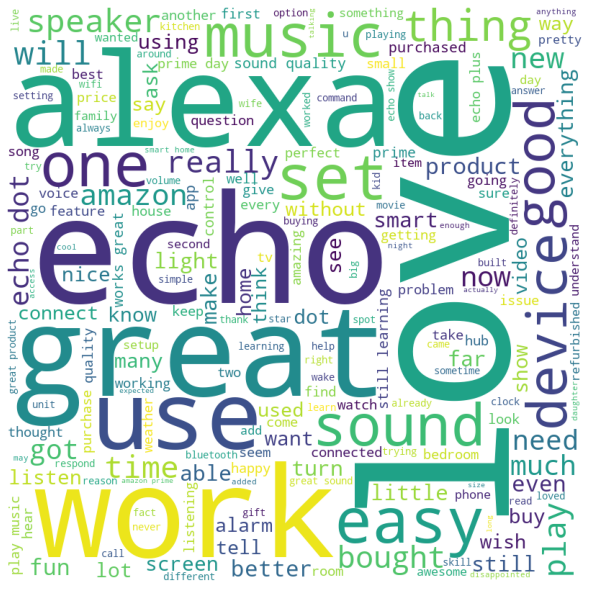

In [29]:
# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(' '.join(df['processed_text']))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(stop_words='english')

# Fit the vectorizer on the processed text
vectorizer.fit(df['processed_text'])

# Get the frequency of the words
word_freq = vectorizer.transform(df['processed_text']).toarray().sum(axis=0)

# Get the corresponding words
words = vectorizer.get_feature_names()

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(words, word_freq))

# Print the top 10 most frequent words
print(sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:50])


[('love', 922), ('echo', 694), ('great', 548), ('like', 484), ('alexa', 463), ('music', 371), ('works', 365), ('use', 362), ('just', 327), ('easy', 321), ('set', 295), ('sound', 274), ('good', 221), ('amazon', 217), ('play', 211), ('really', 191), ('bought', 185), ('dot', 177), ('speaker', 164), ('smart', 162), ('prime', 159), ('product', 147), ('better', 143), ('new', 142), ('home', 140), ('does', 137), ('got', 133), ('device', 131), ('having', 130), ('time', 129), ('quality', 125), ('fun', 118), ('work', 115), ('things', 112), ('little', 109), ('far', 108), ('able', 107), ('learning', 106), ('ask', 102), ('need', 98), ('buy', 95), ('thing', 94), ('turn', 93), ('day', 92), ('using', 92), ('want', 92), ('screen', 91), ('know', 89), ('alarm', 87), ('used', 87)]


C:\Users\meenu\anaconda32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


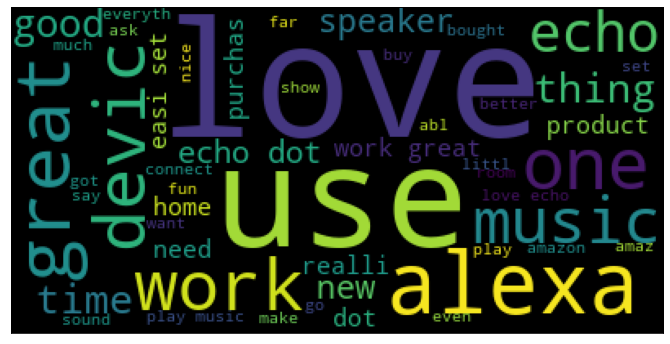

In [31]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
pos_wc = wc.generate(df[df['feedback'] == 1]['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(pos_wc);

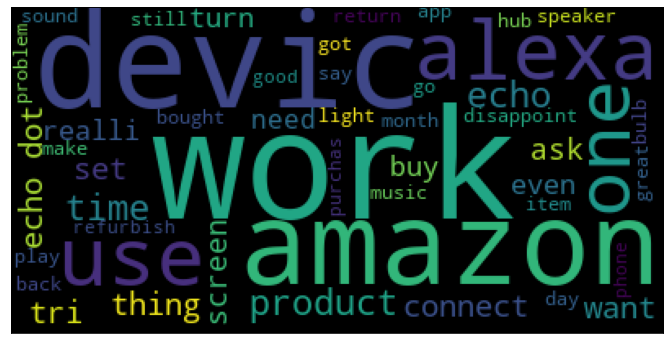

In [32]:
plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'black')
neg_wc = wc.generate(df[df['feedback'] == 0]['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(neg_wc);

### Create representation of Review Text by calculating Term Frequency and Inverse Document Frequency (TF-IDF)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
#tf idf
tf_idf = TfidfVectorizer()
#applying tf idf to data
data_tf = tf_idf.fit_transform(df['text_wo_url'])

KeyError: 'text_wo_url'

In [ ]:
print("n_samples: %d, n_features: %d" % data_tf.shape)

In [ ]:
# Fit the vectorizer on the processed text
vectorizer.fit(df['processed_text'])

# Transform the processed text to a TF-IDF matrix
tf_idf = vectorizer.transform(df['processed_text'])

# Convert the sparse matrix to a numpy array
tf_idf_array = tf_idf.toarray()
print(tf_idf_array[0])

In [ ]:
# Get the corresponding words
words = vectorizer.get_feature_names()

# Print the words with the highest TF-IDF values for the first review
tf_idf_scores = list(zip(words, tf_idf_array[0]))
tf_idf_scores_sorted = sorted(tf_idf_scores, key=lambda x: x[1], reverse=True)
print(tf_idf_scores_sorted[:10])

In [ ]:
# Create a dataframe from the TF-IDF array for the first 10 reviews
tf_idf_df = pd.DataFrame(tf_idf_array[:10], columns=vectorizer.get_feature_names())

# Create a heatmap of the TF-IDF values for the first 10 reviews
sns.heatmap(tf_idf_df, cmap='Blues')
plt.show()